## Bike Rental Prediction with ANN: Learning Rate = 1e-5

This project aims at predicting bike rental rate based on weather and holiday information. The dataset contains hourly count of public bikes rented in Seoul Bike Sharing System, along with the corresponding weather data and holidays information, and is available at: https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

In this notebook, we train an artificial neural network with learning rate = 1e-5 to make predictions

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# reading feature-engineered saved data file
df = pd.read_pickle('data_feat_eng.pkl')

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,No Holiday,Funct_Day
0,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,12,0,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,12,0,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,12,0,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,12,0,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,12,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   int64  
 8   Rainfall(mm)               8760 non-null   int64  
 9   Snowfall (cm)              8760 non-null   int64  
 10  Month                      8760 non-null   int64  
 11  Year                       8760 non-null   int64  
 12  No Holiday                 8760 non-null   uint8  
 13  Funct_Day                  8760 non-null   uint8

There are 13 numerical features

### Train-Test Splitting of Data

In [5]:
# features and labels are singled out of the dataframe

X = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Data pre-processing

Pairwise correlation of features, if high, may suggest throwing away some of the features

Text(0.5, 1.0, 'Pairwise Correlation of Featues')

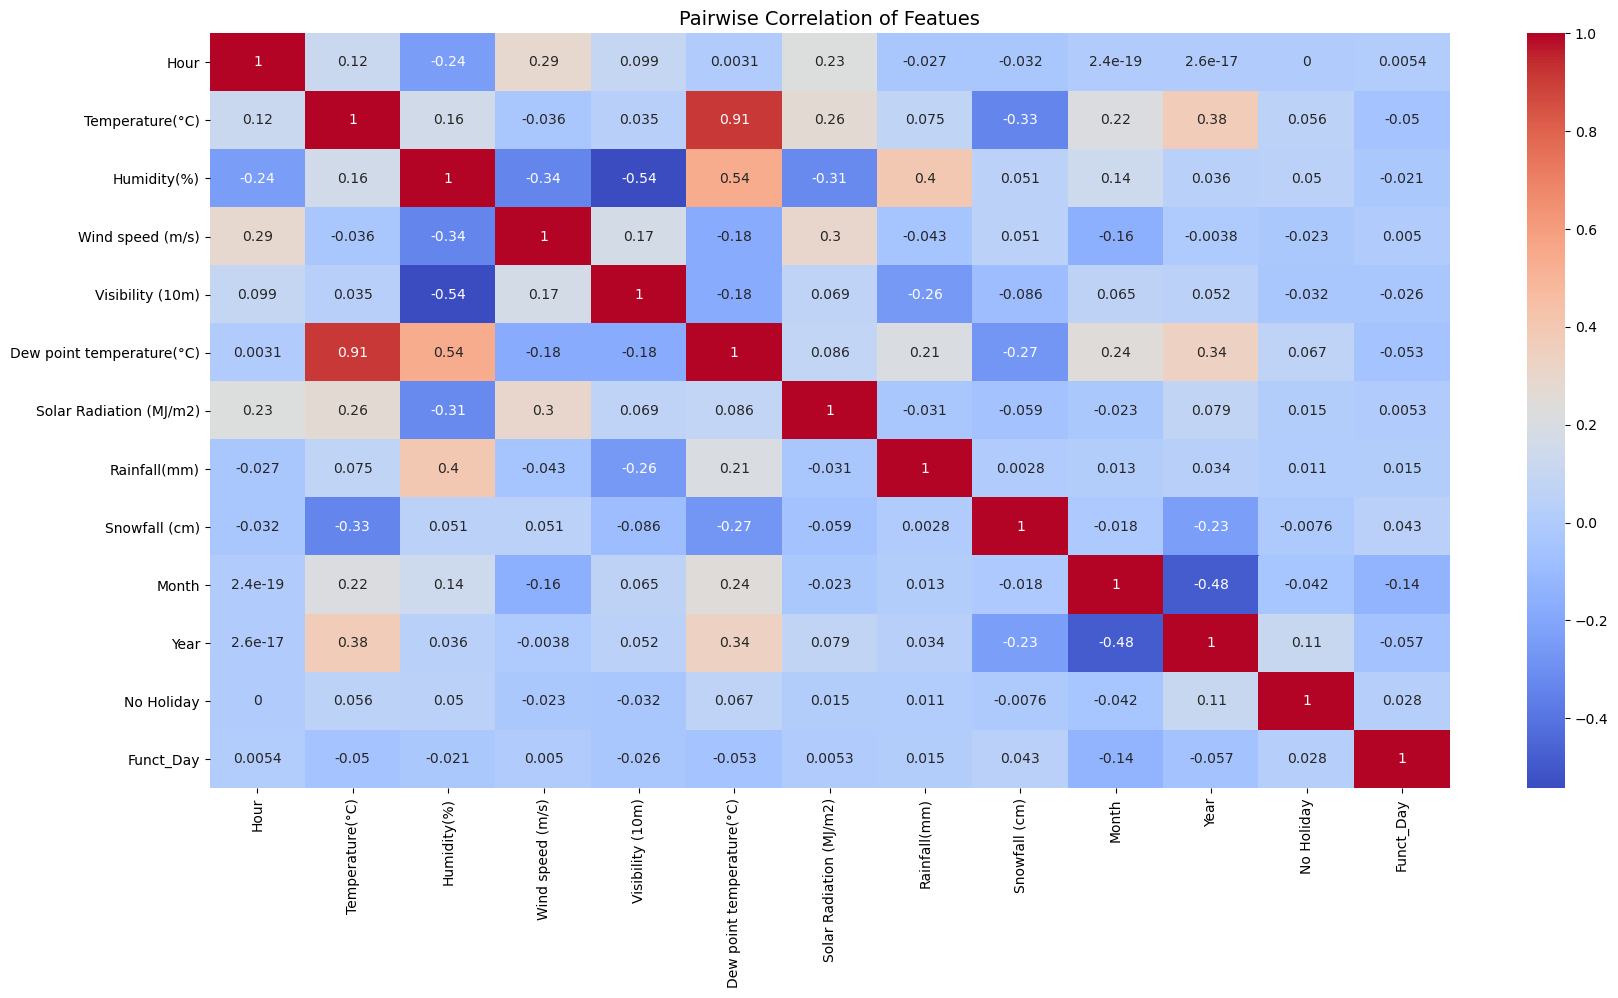

In [6]:
# pairwise correlation of featues
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.title('Pairwise Correlation of Featues', fontsize=14)

There is a single highly correlated pair. We may need to perform PCA

#### Principal Component Analysis

In [7]:
from sklearn.preprocessing import MinMaxScaler

# feature scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

To see how many principal components may be needed, let us plot cumulative explained variance

Text(0, 0.5, 'Cumulative explained variance')

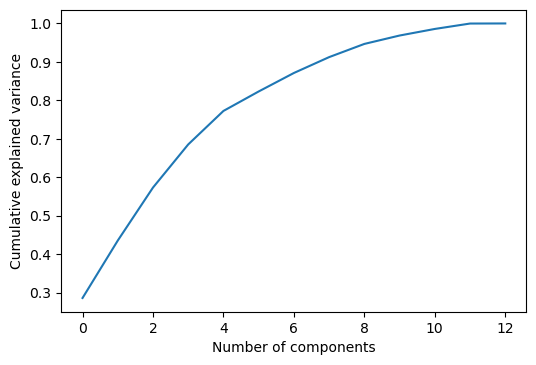

In [8]:
from sklearn.decomposition import PCA

# making the list of cumulative explained variance
pca = PCA().fit(X_train)
cumsum_list = pca.explained_variance_ratio_.cumsum()

# making the plot of cumulative explained variance
plt.figure(dpi=100)
plt.plot(cumsum_list)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We will retain as many principal components as account for 99% cumulative variance:

In [9]:
pc_model = PCA(n_components=0.99, svd_solver='full')
pc_model.fit(X_train)
pc_model.n_components_ 

12

This rids of one more feature. Now we select out the proncipal components

In [10]:
# principal component selection
X_train = pc_model.fit_transform(X_train)
X_test = pc_model.transform(X_test)

Next we create an artificial neural network for training

### Creating the Model

In [11]:
# import tensorflow and check version
import tensorflow as tf
tf.__version__

'2.4.1'

In [12]:
# imports for network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [13]:
def create_ann():
    '''This function creates an ANN model'''
    
    # start neural network
    model = Sequential()
    
    model.add(Dense(12, activation='relu')) # input layer
    
    model.add(Dense(12, activation='relu')) # first hidden layer
    
    model.add(Dense(12, activation='relu')) # second hidden layer
    
    model.add(Dense(1))                    # output layer
    
    # compile neural network
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5) # default learning_rate = 0.001
    model.compile(optimizer=opt,loss='mae')
    
    # return compiled network
    return model

In [14]:
# model created
ann = create_ann()

Now we will train the ANN with validation_split = 0.1, batch_size = 128, for 10_000 epochs

In [15]:
import time
t1 = time.time()

# training the model
ann.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=10_000)

t2 = time.time()

Epoch 1/10000
50/50 [==============================] - 4s 53ms/step - loss: 714.4438 - val_loss: 698.0483
Epoch 2/10000
50/50 [==============================] - 0s 3ms/step - loss: 704.1238 - val_loss: 698.0448
Epoch 3/10000
50/50 [==============================] - 0s 3ms/step - loss: 721.7183 - val_loss: 698.0412
Epoch 4/10000
50/50 [==============================] - 0s 3ms/step - loss: 718.1498 - val_loss: 698.0376
Epoch 5/10000
50/50 [==============================] - 0s 3ms/step - loss: 704.6622 - val_loss: 698.0340
Epoch 6/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.6738 - val_loss: 698.0303
Epoch 7/10000
50/50 [==============================] - 0s 3ms/step - loss: 700.2727 - val_loss: 698.0266
Epoch 8/10000
50/50 [==============================] - 0s 3ms/step - loss: 712.0014 - val_loss: 698.0229
Epoch 9/10000
50/50 [==============================] - 0s 3ms/step - loss: 713.4299 - val_loss: 698.0192
Epoch 10/10000
50/50 [==============================] 

50/50 [==============================] - 0s 3ms/step - loss: 700.8251 - val_loss: 697.6315
Epoch 79/10000
50/50 [==============================] - 0s 3ms/step - loss: 692.8322 - val_loss: 697.6236
Epoch 80/10000
50/50 [==============================] - 0s 3ms/step - loss: 716.8865 - val_loss: 697.6155
Epoch 81/10000
50/50 [==============================] - 0s 3ms/step - loss: 708.3234 - val_loss: 697.6075
Epoch 82/10000
50/50 [==============================] - 0s 3ms/step - loss: 713.8185 - val_loss: 697.5992
Epoch 83/10000
50/50 [==============================] - 0s 3ms/step - loss: 716.3638 - val_loss: 697.5909
Epoch 84/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.2628 - val_loss: 697.5825
Epoch 85/10000
50/50 [==============================] - 0s 3ms/step - loss: 717.1553 - val_loss: 697.5741
Epoch 86/10000
50/50 [==============================] - 0s 3ms/step - loss: 699.7377 - val_loss: 697.5657
Epoch 87/10000
50/50 [==============================] - 0s 3m

Epoch 155/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.4177 - val_loss: 696.7646
Epoch 156/10000
50/50 [==============================] - 0s 3ms/step - loss: 687.3229 - val_loss: 696.7498
Epoch 157/10000
50/50 [==============================] - 0s 3ms/step - loss: 709.2439 - val_loss: 696.7347
Epoch 158/10000
50/50 [==============================] - 0s 3ms/step - loss: 709.3588 - val_loss: 696.7197
Epoch 159/10000
50/50 [==============================] - 0s 3ms/step - loss: 711.7757 - val_loss: 696.7045
Epoch 160/10000
50/50 [==============================] - 0s 3ms/step - loss: 702.5502 - val_loss: 696.6892
Epoch 161/10000
50/50 [==============================] - 0s 3ms/step - loss: 707.7412 - val_loss: 696.6737
Epoch 162/10000
50/50 [==============================] - 0s 3ms/step - loss: 706.7155 - val_loss: 696.6582
Epoch 163/10000
50/50 [==============================] - 0s 3ms/step - loss: 708.4755 - val_loss: 696.6426
Epoch 164/10000
50/50 [==============

50/50 [==============================] - 0s 3ms/step - loss: 706.1669 - val_loss: 695.3218
Epoch 232/10000
50/50 [==============================] - 0s 3ms/step - loss: 709.5202 - val_loss: 695.2981
Epoch 233/10000
50/50 [==============================] - 0s 3ms/step - loss: 702.2798 - val_loss: 695.2745
Epoch 234/10000
50/50 [==============================] - 0s 3ms/step - loss: 700.2318 - val_loss: 695.2507
Epoch 235/10000
50/50 [==============================] - 0s 3ms/step - loss: 705.7474 - val_loss: 695.2267
Epoch 236/10000
50/50 [==============================] - 0s 3ms/step - loss: 715.6040 - val_loss: 695.2027
Epoch 237/10000
50/50 [==============================] - 0s 3ms/step - loss: 712.8293 - val_loss: 695.1784
Epoch 238/10000
50/50 [==============================] - 0s 3ms/step - loss: 697.4405 - val_loss: 695.1540
Epoch 239/10000
50/50 [==============================] - 0s 3ms/step - loss: 709.3397 - val_loss: 695.1295
Epoch 240/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 707.0965 - val_loss: 693.0974
Epoch 308/10000
50/50 [==============================] - 0s 4ms/step - loss: 713.1922 - val_loss: 693.0616
Epoch 309/10000
50/50 [==============================] - 0s 3ms/step - loss: 707.6243 - val_loss: 693.0257
Epoch 310/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.7772 - val_loss: 692.9896
Epoch 311/10000
50/50 [==============================] - 0s 3ms/step - loss: 708.8226 - val_loss: 692.9533
Epoch 312/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.8682 - val_loss: 692.9167
Epoch 313/10000
50/50 [==============================] - 0s 3ms/step - loss: 699.1336 - val_loss: 692.8800
Epoch 314/10000
50/50 [==============================] - 0s 3ms/step - loss: 709.1611 - val_loss: 692.8431
Epoch 315/10000
50/50 [==============================] - 0s 3ms/step - loss: 703.6799 - val_loss: 692.8061
Epoch 316/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 706.6064 - val_loss: 689.8107
Epoch 384/10000
50/50 [==============================] - 0s 3ms/step - loss: 692.6614 - val_loss: 689.7590
Epoch 385/10000
50/50 [==============================] - 0s 3ms/step - loss: 703.9273 - val_loss: 689.7071
Epoch 386/10000
50/50 [==============================] - 0s 3ms/step - loss: 703.7025 - val_loss: 689.6550
Epoch 387/10000
50/50 [==============================] - 0s 3ms/step - loss: 694.3061 - val_loss: 689.6026
Epoch 388/10000
50/50 [==============================] - 0s 3ms/step - loss: 706.0440 - val_loss: 689.5499
Epoch 389/10000
50/50 [==============================] - 0s 3ms/step - loss: 710.0442 - val_loss: 689.4968
Epoch 390/10000
50/50 [==============================] - 0s 3ms/step - loss: 697.2722 - val_loss: 689.4437
Epoch 391/10000
50/50 [==============================] - 0s 3ms/step - loss: 704.3182 - val_loss: 689.3901
Epoch 392/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 705.7235 - val_loss: 685.0717
Epoch 460/10000
50/50 [==============================] - 0s 4ms/step - loss: 696.5646 - val_loss: 684.9977
Epoch 461/10000
50/50 [==============================] - 0s 4ms/step - loss: 694.9991 - val_loss: 684.9228
Epoch 462/10000
50/50 [==============================] - 0s 4ms/step - loss: 702.4562 - val_loss: 684.8481
Epoch 463/10000
50/50 [==============================] - 0s 4ms/step - loss: 694.3643 - val_loss: 684.7730
Epoch 464/10000
50/50 [==============================] - 0s 4ms/step - loss: 686.6929 - val_loss: 684.6975
Epoch 465/10000
50/50 [==============================] - 0s 4ms/step - loss: 694.9943 - val_loss: 684.6216
Epoch 466/10000
50/50 [==============================] - 0s 4ms/step - loss: 698.6221 - val_loss: 684.5452
Epoch 467/10000
50/50 [==============================] - 0s 4ms/step - loss: 688.8122 - val_loss: 684.4682
Epoch 468/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 692.0575 - val_loss: 678.4433
Epoch 536/10000
50/50 [==============================] - 0s 3ms/step - loss: 683.1477 - val_loss: 678.3421
Epoch 537/10000
50/50 [==============================] - 0s 3ms/step - loss: 686.5620 - val_loss: 678.2395
Epoch 538/10000
50/50 [==============================] - 0s 3ms/step - loss: 693.7380 - val_loss: 678.1368
Epoch 539/10000
50/50 [==============================] - 0s 3ms/step - loss: 678.2469 - val_loss: 678.0340
Epoch 540/10000
50/50 [==============================] - 0s 3ms/step - loss: 684.6189 - val_loss: 677.9305
Epoch 541/10000
50/50 [==============================] - 0s 3ms/step - loss: 693.4114 - val_loss: 677.8265
Epoch 542/10000
50/50 [==============================] - 0s 3ms/step - loss: 685.3866 - val_loss: 677.7219
Epoch 543/10000
50/50 [==============================] - 0s 3ms/step - loss: 676.1628 - val_loss: 677.6172
Epoch 544/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 693.7241 - val_loss: 669.4425
Epoch 612/10000
50/50 [==============================] - 0s 3ms/step - loss: 677.9937 - val_loss: 669.3055
Epoch 613/10000
50/50 [==============================] - 0s 3ms/step - loss: 679.6678 - val_loss: 669.1684
Epoch 614/10000
50/50 [==============================] - 0s 3ms/step - loss: 684.7075 - val_loss: 669.0307
Epoch 615/10000
50/50 [==============================] - 0s 3ms/step - loss: 677.2367 - val_loss: 668.8926
Epoch 616/10000
50/50 [==============================] - 0s 3ms/step - loss: 671.6947 - val_loss: 668.7539
Epoch 617/10000
50/50 [==============================] - 0s 3ms/step - loss: 679.7907 - val_loss: 668.6145
Epoch 618/10000
50/50 [==============================] - 0s 3ms/step - loss: 678.4057 - val_loss: 668.4743
Epoch 619/10000
50/50 [==============================] - 0s 3ms/step - loss: 686.5269 - val_loss: 668.3344
Epoch 620/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 654.7239 - val_loss: 657.6607
Epoch 688/10000
50/50 [==============================] - 0s 3ms/step - loss: 670.1460 - val_loss: 657.4877
Epoch 689/10000
50/50 [==============================] - 0s 3ms/step - loss: 657.2870 - val_loss: 657.3128
Epoch 690/10000
50/50 [==============================] - 0s 3ms/step - loss: 655.8743 - val_loss: 657.1385
Epoch 691/10000
50/50 [==============================] - 0s 3ms/step - loss: 666.7749 - val_loss: 656.9635
Epoch 692/10000
50/50 [==============================] - 0s 3ms/step - loss: 656.3812 - val_loss: 656.7872
Epoch 693/10000
50/50 [==============================] - 0s 3ms/step - loss: 690.2018 - val_loss: 656.6108
Epoch 694/10000
50/50 [==============================] - 0s 3ms/step - loss: 656.0186 - val_loss: 656.4338
Epoch 695/10000
50/50 [==============================] - 0s 3ms/step - loss: 662.1305 - val_loss: 656.2565
Epoch 696/10000
50/50 [==============================

50/50 [==============================] - 0s 4ms/step - loss: 651.1600 - val_loss: 643.0414
Epoch 764/10000
50/50 [==============================] - 0s 4ms/step - loss: 651.3115 - val_loss: 642.8270
Epoch 765/10000
50/50 [==============================] - 0s 4ms/step - loss: 662.7245 - val_loss: 642.6115
Epoch 766/10000
50/50 [==============================] - 0s 4ms/step - loss: 647.6611 - val_loss: 642.3952
Epoch 767/10000
50/50 [==============================] - 0s 4ms/step - loss: 634.1506 - val_loss: 642.1787
Epoch 768/10000
50/50 [==============================] - 0s 4ms/step - loss: 649.4278 - val_loss: 641.9623
Epoch 769/10000
50/50 [==============================] - 0s 4ms/step - loss: 635.3297 - val_loss: 641.7442
Epoch 770/10000
50/50 [==============================] - 0s 5ms/step - loss: 656.3388 - val_loss: 641.5259
Epoch 771/10000
50/50 [==============================] - 0s 5ms/step - loss: 649.1946 - val_loss: 641.3077
Epoch 772/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 638.8421 - val_loss: 625.0490
Epoch 840/10000
50/50 [==============================] - 0s 4ms/step - loss: 643.3227 - val_loss: 624.7886
Epoch 841/10000
50/50 [==============================] - 0s 3ms/step - loss: 627.1764 - val_loss: 624.5264
Epoch 842/10000
50/50 [==============================] - 0s 3ms/step - loss: 631.5257 - val_loss: 624.2621
Epoch 843/10000
50/50 [==============================] - 0s 3ms/step - loss: 631.9322 - val_loss: 623.9980
Epoch 844/10000
50/50 [==============================] - 0s 3ms/step - loss: 629.2816 - val_loss: 623.7336
Epoch 845/10000
50/50 [==============================] - 0s 3ms/step - loss: 631.4676 - val_loss: 623.4677
Epoch 846/10000
50/50 [==============================] - 0s 3ms/step - loss: 642.6486 - val_loss: 623.2002
Epoch 847/10000
50/50 [==============================] - 0s 3ms/step - loss: 643.3665 - val_loss: 622.9325
Epoch 848/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 613.5345 - val_loss: 603.1797
Epoch 916/10000
50/50 [==============================] - 0s 3ms/step - loss: 604.3731 - val_loss: 602.8665
Epoch 917/10000
50/50 [==============================] - 0s 3ms/step - loss: 621.0920 - val_loss: 602.5560
Epoch 918/10000
50/50 [==============================] - 0s 3ms/step - loss: 605.5111 - val_loss: 602.2426
Epoch 919/10000
50/50 [==============================] - 0s 3ms/step - loss: 604.0847 - val_loss: 601.9282
Epoch 920/10000
50/50 [==============================] - 0s 3ms/step - loss: 609.3859 - val_loss: 601.6130
Epoch 921/10000
50/50 [==============================] - 0s 3ms/step - loss: 604.7480 - val_loss: 601.2994
Epoch 922/10000
50/50 [==============================] - 0s 3ms/step - loss: 609.2124 - val_loss: 600.9833
Epoch 923/10000
50/50 [==============================] - 0s 3ms/step - loss: 611.2734 - val_loss: 600.6669
Epoch 924/10000
50/50 [==============================

50/50 [==============================] - 0s 3ms/step - loss: 578.6310 - val_loss: 577.7953
Epoch 992/10000
50/50 [==============================] - 0s 3ms/step - loss: 601.3257 - val_loss: 577.4409
Epoch 993/10000
50/50 [==============================] - 0s 3ms/step - loss: 572.8748 - val_loss: 577.0873
Epoch 994/10000
50/50 [==============================] - 0s 3ms/step - loss: 594.5559 - val_loss: 576.7372
Epoch 995/10000
50/50 [==============================] - 0s 3ms/step - loss: 582.6770 - val_loss: 576.3810
Epoch 996/10000
50/50 [==============================] - 0s 3ms/step - loss: 580.3197 - val_loss: 576.0278
Epoch 997/10000
50/50 [==============================] - 0s 3ms/step - loss: 584.1319 - val_loss: 575.6722
Epoch 998/10000
50/50 [==============================] - 0s 3ms/step - loss: 577.6431 - val_loss: 575.3168
Epoch 999/10000
50/50 [==============================] - 0s 3ms/step - loss: 595.2274 - val_loss: 574.9575
Epoch 1000/10000
50/50 [=============================

50/50 [==============================] - 0s 3ms/step - loss: 556.3509 - val_loss: 549.7036
Epoch 1068/10000
50/50 [==============================] - 0s 3ms/step - loss: 564.9000 - val_loss: 549.3181
Epoch 1069/10000
50/50 [==============================] - 0s 3ms/step - loss: 544.2568 - val_loss: 548.9351
Epoch 1070/10000
50/50 [==============================] - 0s 3ms/step - loss: 557.7537 - val_loss: 548.5477
Epoch 1071/10000
50/50 [==============================] - 0s 3ms/step - loss: 549.9857 - val_loss: 548.1608
Epoch 1072/10000
50/50 [==============================] - 0s 3ms/step - loss: 563.5354 - val_loss: 547.7752
Epoch 1073/10000
50/50 [==============================] - 0s 3ms/step - loss: 550.7666 - val_loss: 547.3885
Epoch 1074/10000
50/50 [==============================] - 0s 3ms/step - loss: 545.5074 - val_loss: 546.9945
Epoch 1075/10000
50/50 [==============================] - 0s 3ms/step - loss: 555.3305 - val_loss: 546.6012
Epoch 1076/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 536.0474 - val_loss: 519.4837
Epoch 1144/10000
50/50 [==============================] - 0s 3ms/step - loss: 525.5160 - val_loss: 519.0815
Epoch 1145/10000
50/50 [==============================] - 0s 3ms/step - loss: 522.3185 - val_loss: 518.6821
Epoch 1146/10000
50/50 [==============================] - 0s 3ms/step - loss: 521.1873 - val_loss: 518.2798
Epoch 1147/10000
50/50 [==============================] - 0s 3ms/step - loss: 534.7086 - val_loss: 517.8735
Epoch 1148/10000
50/50 [==============================] - 0s 3ms/step - loss: 524.1132 - val_loss: 517.4722
Epoch 1149/10000
50/50 [==============================] - 0s 3ms/step - loss: 538.4552 - val_loss: 517.0701
Epoch 1150/10000
50/50 [==============================] - 0s 3ms/step - loss: 512.6121 - val_loss: 516.6715
Epoch 1151/10000
50/50 [==============================] - 0s 3ms/step - loss: 539.5620 - val_loss: 516.2608
Epoch 1152/10000
50/50 [=====================

Epoch 1219/10000
50/50 [==============================] - 0s 5ms/step - loss: 494.1499 - val_loss: 488.6685
Epoch 1220/10000
50/50 [==============================] - 0s 5ms/step - loss: 494.1195 - val_loss: 488.2834
Epoch 1221/10000
50/50 [==============================] - 0s 6ms/step - loss: 490.0368 - val_loss: 487.8925
Epoch 1222/10000
50/50 [==============================] - 0s 5ms/step - loss: 498.0379 - val_loss: 487.5022
Epoch 1223/10000
50/50 [==============================] - 0s 5ms/step - loss: 491.5620 - val_loss: 487.1117
Epoch 1224/10000
50/50 [==============================] - 0s 5ms/step - loss: 488.8519 - val_loss: 486.7202
Epoch 1225/10000
50/50 [==============================] - 0s 5ms/step - loss: 486.9858 - val_loss: 486.3292
Epoch 1226/10000
50/50 [==============================] - 0s 5ms/step - loss: 490.6349 - val_loss: 485.9387
Epoch 1227/10000
50/50 [==============================] - 0s 5ms/step - loss: 489.9715 - val_loss: 485.5493
Epoch 1228/10000
50/50 [====

Epoch 1295/10000
50/50 [==============================] - 0s 3ms/step - loss: 461.4331 - val_loss: 459.2245
Epoch 1296/10000
50/50 [==============================] - 0s 3ms/step - loss: 464.2827 - val_loss: 458.8486
Epoch 1297/10000
50/50 [==============================] - 0s 3ms/step - loss: 456.8173 - val_loss: 458.4830
Epoch 1298/10000
50/50 [==============================] - 0s 3ms/step - loss: 462.0120 - val_loss: 458.1066
Epoch 1299/10000
50/50 [==============================] - 0s 3ms/step - loss: 467.8659 - val_loss: 457.7324
Epoch 1300/10000
50/50 [==============================] - 0s 3ms/step - loss: 456.2005 - val_loss: 457.3596
Epoch 1301/10000
50/50 [==============================] - 0s 4ms/step - loss: 467.2610 - val_loss: 456.9822
Epoch 1302/10000
50/50 [==============================] - 0s 4ms/step - loss: 462.6655 - val_loss: 456.6047
Epoch 1303/10000
50/50 [==============================] - 0s 4ms/step - loss: 459.5385 - val_loss: 456.2253
Epoch 1304/10000
50/50 [====

Epoch 1371/10000
50/50 [==============================] - 0s 3ms/step - loss: 438.2843 - val_loss: 432.6376
Epoch 1372/10000
50/50 [==============================] - 0s 3ms/step - loss: 435.1786 - val_loss: 432.3123
Epoch 1373/10000
50/50 [==============================] - 0s 3ms/step - loss: 443.3490 - val_loss: 431.9836
Epoch 1374/10000
50/50 [==============================] - 0s 3ms/step - loss: 439.0914 - val_loss: 431.6516
Epoch 1375/10000
50/50 [==============================] - 0s 3ms/step - loss: 428.6109 - val_loss: 431.3236
Epoch 1376/10000
50/50 [==============================] - 0s 3ms/step - loss: 422.6239 - val_loss: 431.0003
Epoch 1377/10000
50/50 [==============================] - 0s 3ms/step - loss: 431.0943 - val_loss: 430.6794
Epoch 1378/10000
50/50 [==============================] - 0s 3ms/step - loss: 429.0936 - val_loss: 430.3552
Epoch 1379/10000
50/50 [==============================] - 0s 3ms/step - loss: 433.5213 - val_loss: 430.0417
Epoch 1380/10000
50/50 [====

Epoch 1447/10000
50/50 [==============================] - 0s 3ms/step - loss: 411.1163 - val_loss: 411.4120
Epoch 1448/10000
50/50 [==============================] - 0s 3ms/step - loss: 416.6639 - val_loss: 411.1669
Epoch 1449/10000
50/50 [==============================] - 0s 3ms/step - loss: 402.5335 - val_loss: 410.9197
Epoch 1450/10000
50/50 [==============================] - 0s 3ms/step - loss: 411.9263 - val_loss: 410.6775
Epoch 1451/10000
50/50 [==============================] - 0s 3ms/step - loss: 411.9766 - val_loss: 410.4437
Epoch 1452/10000
50/50 [==============================] - 0s 3ms/step - loss: 416.6834 - val_loss: 410.2058
Epoch 1453/10000
50/50 [==============================] - 0s 2ms/step - loss: 407.8494 - val_loss: 409.9730
Epoch 1454/10000
50/50 [==============================] - 0s 3ms/step - loss: 413.5396 - val_loss: 409.7458
Epoch 1455/10000
50/50 [==============================] - 0s 3ms/step - loss: 403.0352 - val_loss: 409.5209
Epoch 1456/10000
50/50 [====

Epoch 1523/10000
50/50 [==============================] - 0s 3ms/step - loss: 394.6785 - val_loss: 395.1866
Epoch 1524/10000
50/50 [==============================] - 0s 3ms/step - loss: 397.2602 - val_loss: 394.9968
Epoch 1525/10000
50/50 [==============================] - 0s 3ms/step - loss: 386.8578 - val_loss: 394.8146
Epoch 1526/10000
50/50 [==============================] - 0s 4ms/step - loss: 385.5963 - val_loss: 394.6254
Epoch 1527/10000
50/50 [==============================] - 0s 3ms/step - loss: 392.6102 - val_loss: 394.4399
Epoch 1528/10000
50/50 [==============================] - 0s 3ms/step - loss: 390.2816 - val_loss: 394.2546
Epoch 1529/10000
50/50 [==============================] - 0s 3ms/step - loss: 386.6995 - val_loss: 394.0702
Epoch 1530/10000
50/50 [==============================] - 0s 3ms/step - loss: 384.9468 - val_loss: 393.8819
Epoch 1531/10000
50/50 [==============================] - 0s 3ms/step - loss: 387.5407 - val_loss: 393.6977
Epoch 1532/10000
50/50 [====

Epoch 1599/10000
50/50 [==============================] - 0s 6ms/step - loss: 372.4481 - val_loss: 381.8587
Epoch 1600/10000
50/50 [==============================] - 0s 6ms/step - loss: 375.2040 - val_loss: 381.7003
Epoch 1601/10000
50/50 [==============================] - 0s 6ms/step - loss: 380.7367 - val_loss: 381.5441
Epoch 1602/10000
50/50 [==============================] - 0s 6ms/step - loss: 382.2115 - val_loss: 381.3849
Epoch 1603/10000
50/50 [==============================] - 0s 6ms/step - loss: 377.4520 - val_loss: 381.2303
Epoch 1604/10000
50/50 [==============================] - 0s 6ms/step - loss: 370.8293 - val_loss: 381.0724
Epoch 1605/10000
50/50 [==============================] - 0s 6ms/step - loss: 376.4858 - val_loss: 380.9152
Epoch 1606/10000
50/50 [==============================] - 0s 5ms/step - loss: 376.8977 - val_loss: 380.7559
Epoch 1607/10000
50/50 [==============================] - 0s 5ms/step - loss: 375.4270 - val_loss: 380.5992
Epoch 1608/10000
50/50 [====

Epoch 1675/10000
50/50 [==============================] - 0s 4ms/step - loss: 365.4783 - val_loss: 369.9487
Epoch 1676/10000
50/50 [==============================] - 0s 4ms/step - loss: 366.8741 - val_loss: 369.7948
Epoch 1677/10000
50/50 [==============================] - 0s 4ms/step - loss: 364.5904 - val_loss: 369.6404
Epoch 1678/10000
50/50 [==============================] - 0s 4ms/step - loss: 359.6894 - val_loss: 369.4851
Epoch 1679/10000
50/50 [==============================] - 0s 3ms/step - loss: 362.2975 - val_loss: 369.3311
Epoch 1680/10000
50/50 [==============================] - 0s 3ms/step - loss: 365.4158 - val_loss: 369.1767
Epoch 1681/10000
50/50 [==============================] - 0s 3ms/step - loss: 366.3927 - val_loss: 369.0233
Epoch 1682/10000
50/50 [==============================] - 0s 3ms/step - loss: 365.3410 - val_loss: 368.8725
Epoch 1683/10000
50/50 [==============================] - 0s 3ms/step - loss: 363.7927 - val_loss: 368.7198
Epoch 1684/10000
50/50 [====

Epoch 1751/10000
50/50 [==============================] - 0s 3ms/step - loss: 358.7691 - val_loss: 358.7642
Epoch 1752/10000
50/50 [==============================] - 0s 3ms/step - loss: 349.0047 - val_loss: 358.6237
Epoch 1753/10000
50/50 [==============================] - 0s 3ms/step - loss: 348.6005 - val_loss: 358.4812
Epoch 1754/10000
50/50 [==============================] - 0s 3ms/step - loss: 356.7571 - val_loss: 358.3426
Epoch 1755/10000
50/50 [==============================] - 0s 3ms/step - loss: 351.3969 - val_loss: 358.2021
Epoch 1756/10000
50/50 [==============================] - 0s 3ms/step - loss: 347.7315 - val_loss: 358.0620
Epoch 1757/10000
50/50 [==============================] - 0s 3ms/step - loss: 349.8184 - val_loss: 357.9247
Epoch 1758/10000
50/50 [==============================] - 0s 3ms/step - loss: 344.0968 - val_loss: 357.7866
Epoch 1759/10000
50/50 [==============================] - 0s 3ms/step - loss: 357.1257 - val_loss: 357.6482
Epoch 1760/10000
50/50 [====

Epoch 1827/10000
50/50 [==============================] - 0s 3ms/step - loss: 337.0309 - val_loss: 348.4462
Epoch 1828/10000
50/50 [==============================] - 0s 3ms/step - loss: 335.0071 - val_loss: 348.3176
Epoch 1829/10000
50/50 [==============================] - 0s 3ms/step - loss: 334.3702 - val_loss: 348.1878
Epoch 1830/10000
50/50 [==============================] - 0s 3ms/step - loss: 346.5288 - val_loss: 348.0573
Epoch 1831/10000
50/50 [==============================] - 0s 3ms/step - loss: 334.8469 - val_loss: 347.9265
Epoch 1832/10000
50/50 [==============================] - 0s 3ms/step - loss: 345.4990 - val_loss: 347.7958
Epoch 1833/10000
50/50 [==============================] - 0s 2ms/step - loss: 344.6982 - val_loss: 347.6658
Epoch 1834/10000
50/50 [==============================] - 0s 3ms/step - loss: 339.2494 - val_loss: 347.5354
Epoch 1835/10000
50/50 [==============================] - 0s 3ms/step - loss: 340.4281 - val_loss: 347.4059
Epoch 1836/10000
50/50 [====

Epoch 1903/10000
50/50 [==============================] - 0s 3ms/step - loss: 335.8806 - val_loss: 339.0826
Epoch 1904/10000
50/50 [==============================] - 0s 3ms/step - loss: 334.2728 - val_loss: 338.9656
Epoch 1905/10000
50/50 [==============================] - 0s 3ms/step - loss: 337.3223 - val_loss: 338.8439
Epoch 1906/10000
50/50 [==============================] - 0s 3ms/step - loss: 335.7122 - val_loss: 338.7244
Epoch 1907/10000
50/50 [==============================] - 0s 3ms/step - loss: 333.2349 - val_loss: 338.6057
Epoch 1908/10000
50/50 [==============================] - 0s 3ms/step - loss: 332.4205 - val_loss: 338.4874
Epoch 1909/10000
50/50 [==============================] - 0s 3ms/step - loss: 319.3645 - val_loss: 338.3690
Epoch 1910/10000
50/50 [==============================] - 0s 3ms/step - loss: 331.6041 - val_loss: 338.2525
Epoch 1911/10000
50/50 [==============================] - 0s 3ms/step - loss: 330.8256 - val_loss: 338.1344
Epoch 1912/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 322.8749 - val_loss: 330.3457
Epoch 1979/10000
50/50 [==============================] - 0s 4ms/step - loss: 325.7807 - val_loss: 330.2339
Epoch 1980/10000
50/50 [==============================] - 0s 4ms/step - loss: 325.0013 - val_loss: 330.1187
Epoch 1981/10000
50/50 [==============================] - 0s 4ms/step - loss: 322.7140 - val_loss: 330.0021
Epoch 1982/10000
50/50 [==============================] - 0s 4ms/step - loss: 332.1868 - val_loss: 329.8881
Epoch 1983/10000
50/50 [==============================] - 0s 4ms/step - loss: 324.1192 - val_loss: 329.7763
Epoch 1984/10000
50/50 [==============================] - 0s 4ms/step - loss: 320.6925 - val_loss: 329.6652
Epoch 1985/10000
50/50 [==============================] - 0s 4ms/step - loss: 321.8460 - val_loss: 329.5517
Epoch 1986/10000
50/50 [==============================] - 0s 4ms/step - loss: 328.8408 - val_loss: 329.4363
Epoch 1987/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 317.4104 - val_loss: 322.1678
Epoch 2055/10000
50/50 [==============================] - 0s 4ms/step - loss: 320.4330 - val_loss: 322.0632
Epoch 2056/10000
50/50 [==============================] - 0s 4ms/step - loss: 318.1157 - val_loss: 321.9656
Epoch 2057/10000
50/50 [==============================] - 0s 5ms/step - loss: 313.1782 - val_loss: 321.8631
Epoch 2058/10000
50/50 [==============================] - 0s 4ms/step - loss: 312.9048 - val_loss: 321.7604
Epoch 2059/10000
50/50 [==============================] - 0s 4ms/step - loss: 312.1100 - val_loss: 321.6592
Epoch 2060/10000
50/50 [==============================] - 0s 4ms/step - loss: 322.7409 - val_loss: 321.5583
Epoch 2061/10000
50/50 [==============================] - 0s 4ms/step - loss: 322.9700 - val_loss: 321.4571
Epoch 2062/10000
50/50 [==============================] - 0s 4ms/step - loss: 314.2646 - val_loss: 321.3535
Epoch 2063/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 313.2922 - val_loss: 314.7012
Epoch 2131/10000
50/50 [==============================] - 0s 3ms/step - loss: 312.0697 - val_loss: 314.6038
Epoch 2132/10000
50/50 [==============================] - 0s 3ms/step - loss: 305.4317 - val_loss: 314.5088
Epoch 2133/10000
50/50 [==============================] - 0s 3ms/step - loss: 318.3135 - val_loss: 314.4140
Epoch 2134/10000
50/50 [==============================] - 0s 3ms/step - loss: 305.3944 - val_loss: 314.3184
Epoch 2135/10000
50/50 [==============================] - 0s 3ms/step - loss: 308.3762 - val_loss: 314.2240
Epoch 2136/10000
50/50 [==============================] - 0s 3ms/step - loss: 310.3570 - val_loss: 314.1303
Epoch 2137/10000
50/50 [==============================] - 0s 4ms/step - loss: 303.8496 - val_loss: 314.0334
Epoch 2138/10000
50/50 [==============================] - 0s 3ms/step - loss: 313.4047 - val_loss: 313.9382
Epoch 2139/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 298.9814 - val_loss: 307.5911
Epoch 2207/10000
50/50 [==============================] - 0s 3ms/step - loss: 305.1002 - val_loss: 307.4982
Epoch 2208/10000
50/50 [==============================] - 0s 3ms/step - loss: 301.3546 - val_loss: 307.4063
Epoch 2209/10000
50/50 [==============================] - 0s 3ms/step - loss: 303.7831 - val_loss: 307.3140
Epoch 2210/10000
50/50 [==============================] - 0s 3ms/step - loss: 296.1484 - val_loss: 307.2206
Epoch 2211/10000
50/50 [==============================] - 0s 3ms/step - loss: 300.1321 - val_loss: 307.1274
Epoch 2212/10000
50/50 [==============================] - 0s 3ms/step - loss: 300.0069 - val_loss: 307.0395
Epoch 2213/10000
50/50 [==============================] - 0s 3ms/step - loss: 301.1447 - val_loss: 306.9456
Epoch 2214/10000
50/50 [==============================] - 0s 3ms/step - loss: 305.3285 - val_loss: 306.8558
Epoch 2215/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 295.3421 - val_loss: 301.0990
Epoch 2283/10000
50/50 [==============================] - 0s 3ms/step - loss: 294.6254 - val_loss: 301.0227
Epoch 2284/10000
50/50 [==============================] - 0s 3ms/step - loss: 293.8958 - val_loss: 300.9447
Epoch 2285/10000
50/50 [==============================] - 0s 3ms/step - loss: 298.8222 - val_loss: 300.8678
Epoch 2286/10000
50/50 [==============================] - 0s 3ms/step - loss: 297.3111 - val_loss: 300.7896
Epoch 2287/10000
50/50 [==============================] - 0s 3ms/step - loss: 297.2529 - val_loss: 300.7116
Epoch 2288/10000
50/50 [==============================] - 0s 3ms/step - loss: 294.8913 - val_loss: 300.6349
Epoch 2289/10000
50/50 [==============================] - 0s 3ms/step - loss: 296.8184 - val_loss: 300.5572
Epoch 2290/10000
50/50 [==============================] - 0s 3ms/step - loss: 298.2063 - val_loss: 300.4810
Epoch 2291/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 289.9136 - val_loss: 295.2271
Epoch 2359/10000
50/50 [==============================] - 0s 4ms/step - loss: 297.1314 - val_loss: 295.1521
Epoch 2360/10000
50/50 [==============================] - 0s 4ms/step - loss: 288.9227 - val_loss: 295.0782
Epoch 2361/10000
50/50 [==============================] - 0s 4ms/step - loss: 288.9229 - val_loss: 295.0023
Epoch 2362/10000
50/50 [==============================] - 0s 5ms/step - loss: 294.3480 - val_loss: 294.9271
Epoch 2363/10000
50/50 [==============================] - 0s 4ms/step - loss: 290.8364 - val_loss: 294.8534
Epoch 2364/10000
50/50 [==============================] - 0s 4ms/step - loss: 287.6259 - val_loss: 294.7809
Epoch 2365/10000
50/50 [==============================] - 0s 5ms/step - loss: 293.1903 - val_loss: 294.7105
Epoch 2366/10000
50/50 [==============================] - 0s 5ms/step - loss: 291.4564 - val_loss: 294.6395
Epoch 2367/10000
50/50 [=====================

Epoch 2434/10000
50/50 [==============================] - 0s 4ms/step - loss: 282.5462 - val_loss: 289.9377
Epoch 2435/10000
50/50 [==============================] - 0s 4ms/step - loss: 285.9776 - val_loss: 289.8727
Epoch 2436/10000
50/50 [==============================] - 0s 3ms/step - loss: 278.6516 - val_loss: 289.8034
Epoch 2437/10000
50/50 [==============================] - 0s 3ms/step - loss: 281.7854 - val_loss: 289.7431
Epoch 2438/10000
50/50 [==============================] - 0s 3ms/step - loss: 286.8341 - val_loss: 289.6737
Epoch 2439/10000
50/50 [==============================] - 0s 3ms/step - loss: 280.5855 - val_loss: 289.6114
Epoch 2440/10000
50/50 [==============================] - 0s 3ms/step - loss: 281.4732 - val_loss: 289.5439
Epoch 2441/10000
50/50 [==============================] - 0s 3ms/step - loss: 283.7465 - val_loss: 289.4782
Epoch 2442/10000
50/50 [==============================] - 0s 3ms/step - loss: 286.9638 - val_loss: 289.4136
Epoch 2443/10000
50/50 [====

Epoch 2510/10000
50/50 [==============================] - 0s 3ms/step - loss: 280.9189 - val_loss: 285.2552
Epoch 2511/10000
50/50 [==============================] - 0s 3ms/step - loss: 282.9791 - val_loss: 285.1976
Epoch 2512/10000
50/50 [==============================] - 0s 3ms/step - loss: 281.7302 - val_loss: 285.1406
Epoch 2513/10000
50/50 [==============================] - 0s 3ms/step - loss: 280.6262 - val_loss: 285.0834
Epoch 2514/10000
50/50 [==============================] - 0s 3ms/step - loss: 285.4133 - val_loss: 285.0294
Epoch 2515/10000
50/50 [==============================] - 0s 4ms/step - loss: 284.1867 - val_loss: 284.9713
Epoch 2516/10000
50/50 [==============================] - 0s 4ms/step - loss: 282.2433 - val_loss: 284.9124
Epoch 2517/10000
50/50 [==============================] - 0s 4ms/step - loss: 283.6812 - val_loss: 284.8619
Epoch 2518/10000
50/50 [==============================] - 0s 4ms/step - loss: 280.5945 - val_loss: 284.8031
Epoch 2519/10000
50/50 [====

Epoch 2586/10000
50/50 [==============================] - 0s 4ms/step - loss: 278.8477 - val_loss: 281.2649
Epoch 2587/10000
50/50 [==============================] - 0s 3ms/step - loss: 281.5681 - val_loss: 281.2228
Epoch 2588/10000
50/50 [==============================] - 0s 3ms/step - loss: 284.0659 - val_loss: 281.1758
Epoch 2589/10000
50/50 [==============================] - 0s 3ms/step - loss: 282.9875 - val_loss: 281.1250
Epoch 2590/10000
50/50 [==============================] - 0s 3ms/step - loss: 277.7069 - val_loss: 281.0796
Epoch 2591/10000
50/50 [==============================] - 0s 3ms/step - loss: 272.7054 - val_loss: 281.0318
Epoch 2592/10000
50/50 [==============================] - 0s 3ms/step - loss: 276.0774 - val_loss: 280.9853
Epoch 2593/10000
50/50 [==============================] - 0s 3ms/step - loss: 278.0240 - val_loss: 280.9361
Epoch 2594/10000
50/50 [==============================] - 0s 3ms/step - loss: 277.9107 - val_loss: 280.8877
Epoch 2595/10000
50/50 [====

Epoch 2662/10000
50/50 [==============================] - 0s 4ms/step - loss: 274.2053 - val_loss: 277.8244
Epoch 2663/10000
50/50 [==============================] - 0s 4ms/step - loss: 280.4248 - val_loss: 277.7809
Epoch 2664/10000
50/50 [==============================] - 0s 4ms/step - loss: 278.9854 - val_loss: 277.7310
Epoch 2665/10000
50/50 [==============================] - 0s 4ms/step - loss: 276.9275 - val_loss: 277.6893
Epoch 2666/10000
50/50 [==============================] - 0s 4ms/step - loss: 278.3300 - val_loss: 277.6370
Epoch 2667/10000
50/50 [==============================] - 0s 4ms/step - loss: 271.9910 - val_loss: 277.5946
Epoch 2668/10000
50/50 [==============================] - 0s 4ms/step - loss: 276.7412 - val_loss: 277.5502
Epoch 2669/10000
50/50 [==============================] - 0s 4ms/step - loss: 276.2697 - val_loss: 277.5023
Epoch 2670/10000
50/50 [==============================] - 0s 5ms/step - loss: 271.5475 - val_loss: 277.4532
Epoch 2671/10000
50/50 [====

Epoch 2738/10000
50/50 [==============================] - 0s 4ms/step - loss: 271.5641 - val_loss: 274.7739
Epoch 2739/10000
50/50 [==============================] - 0s 4ms/step - loss: 272.7078 - val_loss: 274.7430
Epoch 2740/10000
50/50 [==============================] - 0s 4ms/step - loss: 266.8765 - val_loss: 274.7112
Epoch 2741/10000
50/50 [==============================] - 0s 4ms/step - loss: 271.4959 - val_loss: 274.6772
Epoch 2742/10000
50/50 [==============================] - 0s 3ms/step - loss: 275.2517 - val_loss: 274.6471
Epoch 2743/10000
50/50 [==============================] - 0s 4ms/step - loss: 274.4900 - val_loss: 274.6141
Epoch 2744/10000
50/50 [==============================] - 0s 4ms/step - loss: 276.1264 - val_loss: 274.5811
Epoch 2745/10000
50/50 [==============================] - 0s 3ms/step - loss: 276.7236 - val_loss: 274.5473
Epoch 2746/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.5761 - val_loss: 274.5146
Epoch 2747/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 272.8048 - val_loss: 272.6038
Epoch 2814/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.2459 - val_loss: 272.5800
Epoch 2815/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.9758 - val_loss: 272.5529
Epoch 2816/10000
50/50 [==============================] - 0s 3ms/step - loss: 272.1142 - val_loss: 272.5292
Epoch 2817/10000
50/50 [==============================] - 0s 3ms/step - loss: 269.9987 - val_loss: 272.5017
Epoch 2818/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.8037 - val_loss: 272.4734
Epoch 2819/10000
50/50 [==============================] - 0s 3ms/step - loss: 273.5321 - val_loss: 272.4521
Epoch 2820/10000
50/50 [==============================] - 0s 3ms/step - loss: 269.0614 - val_loss: 272.4243
Epoch 2821/10000
50/50 [==============================] - 0s 3ms/step - loss: 269.7687 - val_loss: 272.4005
Epoch 2822/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 271.9736 - val_loss: 270.8122
Epoch 2890/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.5539 - val_loss: 270.7915
Epoch 2891/10000
50/50 [==============================] - 0s 3ms/step - loss: 269.1519 - val_loss: 270.7701
Epoch 2892/10000
50/50 [==============================] - 0s 3ms/step - loss: 273.0575 - val_loss: 270.7500
Epoch 2893/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.5732 - val_loss: 270.7296
Epoch 2894/10000
50/50 [==============================] - 0s 3ms/step - loss: 272.1428 - val_loss: 270.7108
Epoch 2895/10000
50/50 [==============================] - 0s 3ms/step - loss: 270.4174 - val_loss: 270.6903
Epoch 2896/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.0681 - val_loss: 270.6701
Epoch 2897/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.3634 - val_loss: 270.6486
Epoch 2898/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 269.0190 - val_loss: 269.3329
Epoch 2966/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.7625 - val_loss: 269.3127
Epoch 2967/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.5199 - val_loss: 269.2961
Epoch 2968/10000
50/50 [==============================] - 0s 4ms/step - loss: 263.5536 - val_loss: 269.2759
Epoch 2969/10000
50/50 [==============================] - 0s 3ms/step - loss: 270.7022 - val_loss: 269.2593
Epoch 2970/10000
50/50 [==============================] - 0s 4ms/step - loss: 268.7682 - val_loss: 269.2391
Epoch 2971/10000
50/50 [==============================] - 0s 4ms/step - loss: 267.0338 - val_loss: 269.2223
Epoch 2972/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.5314 - val_loss: 269.2043
Epoch 2973/10000
50/50 [==============================] - 0s 4ms/step - loss: 268.1843 - val_loss: 269.1861
Epoch 2974/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 270.7469 - val_loss: 268.0891
Epoch 3042/10000
50/50 [==============================] - 0s 6ms/step - loss: 269.3354 - val_loss: 268.0729
Epoch 3043/10000
50/50 [==============================] - 0s 6ms/step - loss: 265.6654 - val_loss: 268.0580
Epoch 3044/10000
50/50 [==============================] - 0s 5ms/step - loss: 261.9793 - val_loss: 268.0438
Epoch 3045/10000
50/50 [==============================] - 0s 5ms/step - loss: 266.6039 - val_loss: 268.0285
Epoch 3046/10000
50/50 [==============================] - ETA: 0s - loss: 265.819 - 0s 5ms/step - loss: 265.8341 - val_loss: 268.0136
Epoch 3047/10000
50/50 [==============================] - 0s 5ms/step - loss: 272.7946 - val_loss: 267.9985
Epoch 3048/10000
50/50 [==============================] - 0s 5ms/step - loss: 265.0291 - val_loss: 267.9842
Epoch 3049/10000
50/50 [==============================] - 0s 5ms/step - loss: 270.8124 - val_loss: 267.9692
Epoch 3050/10000
50

Epoch 3117/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.6282 - val_loss: 267.0872
Epoch 3118/10000
50/50 [==============================] - 0s 4ms/step - loss: 266.1048 - val_loss: 267.0758
Epoch 3119/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.5089 - val_loss: 267.0643
Epoch 3120/10000
50/50 [==============================] - 0s 3ms/step - loss: 265.1497 - val_loss: 267.0518
Epoch 3121/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.1904 - val_loss: 267.0406
Epoch 3122/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.4717 - val_loss: 267.0284
Epoch 3123/10000
50/50 [==============================] - 0s 3ms/step - loss: 267.3575 - val_loss: 267.0170
Epoch 3124/10000
50/50 [==============================] - 0s 3ms/step - loss: 264.4350 - val_loss: 267.0039
Epoch 3125/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.2234 - val_loss: 266.9923
Epoch 3126/10000
50/50 [====

Epoch 3193/10000
50/50 [==============================] - 0s 4ms/step - loss: 267.4164 - val_loss: 266.2274
Epoch 3194/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.6485 - val_loss: 266.2175
Epoch 3195/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.5502 - val_loss: 266.2071
Epoch 3196/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.5916 - val_loss: 266.1966
Epoch 3197/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.5859 - val_loss: 266.1858
Epoch 3198/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.4483 - val_loss: 266.1761
Epoch 3199/10000
50/50 [==============================] - 0s 3ms/step - loss: 265.8085 - val_loss: 266.1656
Epoch 3200/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.1203 - val_loss: 266.1551
Epoch 3201/10000
50/50 [==============================] - 0s 3ms/step - loss: 264.8850 - val_loss: 266.1435
Epoch 3202/10000
50/50 [====

Epoch 3269/10000
50/50 [==============================] - 0s 3ms/step - loss: 261.3931 - val_loss: 265.4529
Epoch 3270/10000
50/50 [==============================] - 0s 3ms/step - loss: 261.5971 - val_loss: 265.4429
Epoch 3271/10000
50/50 [==============================] - 0s 3ms/step - loss: 267.5370 - val_loss: 265.4344
Epoch 3272/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.7006 - val_loss: 265.4255
Epoch 3273/10000
50/50 [==============================] - 0s 3ms/step - loss: 261.9196 - val_loss: 265.4153
Epoch 3274/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.9148 - val_loss: 265.4043
Epoch 3275/10000
50/50 [==============================] - 0s 3ms/step - loss: 270.1548 - val_loss: 265.3945
Epoch 3276/10000
50/50 [==============================] - 0s 3ms/step - loss: 271.0454 - val_loss: 265.3856
Epoch 3277/10000
50/50 [==============================] - 0s 3ms/step - loss: 274.1968 - val_loss: 265.3762
Epoch 3278/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 263.9785 - val_loss: 264.7486
Epoch 3345/10000
50/50 [==============================] - 0s 4ms/step - loss: 274.9825 - val_loss: 264.7389
Epoch 3346/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.8840 - val_loss: 264.7299
Epoch 3347/10000
50/50 [==============================] - 0s 4ms/step - loss: 265.1398 - val_loss: 264.7198
Epoch 3348/10000
50/50 [==============================] - 0s 4ms/step - loss: 267.6800 - val_loss: 264.7117
Epoch 3349/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.0319 - val_loss: 264.7044
Epoch 3350/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.7196 - val_loss: 264.6957
Epoch 3351/10000
50/50 [==============================] - 0s 4ms/step - loss: 264.5497 - val_loss: 264.6864
Epoch 3352/10000
50/50 [==============================] - 0s 4ms/step - loss: 263.2159 - val_loss: 264.6766
Epoch 3353/10000
50/50 [=====================

Epoch 3420/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.1073 - val_loss: 264.0974
Epoch 3421/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.3489 - val_loss: 264.0887
Epoch 3422/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.1540 - val_loss: 264.0813
Epoch 3423/10000
50/50 [==============================] - 0s 4ms/step - loss: 257.0822 - val_loss: 264.0724
Epoch 3424/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.6419 - val_loss: 264.0638
Epoch 3425/10000
50/50 [==============================] - 0s 4ms/step - loss: 260.3280 - val_loss: 264.0550
Epoch 3426/10000
50/50 [==============================] - 0s 5ms/step - loss: 267.4214 - val_loss: 264.0467
Epoch 3427/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.5957 - val_loss: 264.0386
Epoch 3428/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.9155 - val_loss: 264.0303
Epoch 3429/10000
50/50 [====

Epoch 3496/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.9862 - val_loss: 263.4904
Epoch 3497/10000
50/50 [==============================] - 0s 3ms/step - loss: 268.3920 - val_loss: 263.4830
Epoch 3498/10000
50/50 [==============================] - 0s 3ms/step - loss: 265.3482 - val_loss: 263.4750
Epoch 3499/10000
50/50 [==============================] - 0s 4ms/step - loss: 264.0354 - val_loss: 263.4668
Epoch 3500/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.1095 - val_loss: 263.4597
Epoch 3501/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.1792 - val_loss: 263.4523
Epoch 3502/10000
50/50 [==============================] - 0s 3ms/step - loss: 268.2172 - val_loss: 263.4454
Epoch 3503/10000
50/50 [==============================] - 0s 3ms/step - loss: 266.1063 - val_loss: 263.4372
Epoch 3504/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.4651 - val_loss: 263.4304
Epoch 3505/10000
50/50 [====

Epoch 3572/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.4095 - val_loss: 262.9714
Epoch 3573/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.0346 - val_loss: 262.9647
Epoch 3574/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.8601 - val_loss: 262.9583
Epoch 3575/10000
50/50 [==============================] - 0s 3ms/step - loss: 265.2794 - val_loss: 262.9528
Epoch 3576/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.3145 - val_loss: 262.9456
Epoch 3577/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.0556 - val_loss: 262.9399
Epoch 3578/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.7390 - val_loss: 262.9336
Epoch 3579/10000
50/50 [==============================] - 0s 3ms/step - loss: 266.3065 - val_loss: 262.9279
Epoch 3580/10000
50/50 [==============================] - 0s 2ms/step - loss: 258.0927 - val_loss: 262.9215
Epoch 3581/10000
50/50 [====

Epoch 3648/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.5532 - val_loss: 262.5028
Epoch 3649/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.3180 - val_loss: 262.4964
Epoch 3650/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.3854 - val_loss: 262.4890
Epoch 3651/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.9869 - val_loss: 262.4824
Epoch 3652/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.0736 - val_loss: 262.4759
Epoch 3653/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.8157 - val_loss: 262.4704
Epoch 3654/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.8553 - val_loss: 262.4648
Epoch 3655/10000
50/50 [==============================] - 0s 3ms/step - loss: 264.2273 - val_loss: 262.4579
Epoch 3656/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.8340 - val_loss: 262.4518
Epoch 3657/10000
50/50 [====

Epoch 3724/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.4059 - val_loss: 262.0537
Epoch 3725/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.2193 - val_loss: 262.0494
Epoch 3726/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.6041 - val_loss: 262.0441
Epoch 3727/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.5730 - val_loss: 262.0386
Epoch 3728/10000
50/50 [==============================] - 0s 5ms/step - loss: 261.0102 - val_loss: 262.0322
Epoch 3729/10000
50/50 [==============================] - 0s 4ms/step - loss: 262.5406 - val_loss: 262.0276
Epoch 3730/10000
50/50 [==============================] - 0s 5ms/step - loss: 262.2328 - val_loss: 262.0229
Epoch 3731/10000
50/50 [==============================] - 0s 5ms/step - loss: 257.9923 - val_loss: 262.0172
Epoch 3732/10000
50/50 [==============================] - 0s 4ms/step - loss: 263.3644 - val_loss: 262.0115
Epoch 3733/10000
50/50 [====

Epoch 3800/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.8273 - val_loss: 261.6688
Epoch 3801/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.8167 - val_loss: 261.6629
Epoch 3802/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.3065 - val_loss: 261.6591
Epoch 3803/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.6414 - val_loss: 261.6542
Epoch 3804/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.0073 - val_loss: 261.6510
Epoch 3805/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.0941 - val_loss: 261.6439
Epoch 3806/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.2384 - val_loss: 261.6401
Epoch 3807/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.6556 - val_loss: 261.6354
Epoch 3808/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.2103 - val_loss: 261.6298
Epoch 3809/10000
50/50 [====

Epoch 3876/10000
50/50 [==============================] - 0s 4ms/step - loss: 259.6335 - val_loss: 261.2946
Epoch 3877/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.5793 - val_loss: 261.2878
Epoch 3878/10000
50/50 [==============================] - 0s 4ms/step - loss: 258.8588 - val_loss: 261.2831
Epoch 3879/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.2001 - val_loss: 261.2796
Epoch 3880/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.5457 - val_loss: 261.2735
Epoch 3881/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.0206 - val_loss: 261.2685
Epoch 3882/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.4484 - val_loss: 261.2628
Epoch 3883/10000
50/50 [==============================] - 0s 3ms/step - loss: 264.9874 - val_loss: 261.2551
Epoch 3884/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.3895 - val_loss: 261.2501
Epoch 3885/10000
50/50 [====

Epoch 3952/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.3856 - val_loss: 260.9214
Epoch 3953/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.3923 - val_loss: 260.9162
Epoch 3954/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.0065 - val_loss: 260.9126
Epoch 3955/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.9676 - val_loss: 260.9065
Epoch 3956/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.6964 - val_loss: 260.9018
Epoch 3957/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.1746 - val_loss: 260.8969
Epoch 3958/10000
50/50 [==============================] - 0s 3ms/step - loss: 267.0916 - val_loss: 260.8926
Epoch 3959/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.2648 - val_loss: 260.8871
Epoch 3960/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.8139 - val_loss: 260.8826
Epoch 3961/10000
50/50 [====

Epoch 4028/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.8782 - val_loss: 260.5941
Epoch 4029/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.8773 - val_loss: 260.5894
Epoch 4030/10000
50/50 [==============================] - 0s 5ms/step - loss: 257.3677 - val_loss: 260.5853
Epoch 4031/10000
50/50 [==============================] - 0s 6ms/step - loss: 263.2993 - val_loss: 260.5797
Epoch 4032/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.3352 - val_loss: 260.5757
Epoch 4033/10000
50/50 [==============================] - 0s 5ms/step - loss: 261.6391 - val_loss: 260.5723
Epoch 4034/10000
50/50 [==============================] - 0s 6ms/step - loss: 257.2157 - val_loss: 260.5684
Epoch 4035/10000
50/50 [==============================] - 0s 5ms/step - loss: 253.4934 - val_loss: 260.5643
Epoch 4036/10000
50/50 [==============================] - 0s 5ms/step - loss: 255.6431 - val_loss: 260.5601
Epoch 4037/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 263.2782 - val_loss: 260.2871
Epoch 4104/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.8631 - val_loss: 260.2840
Epoch 4105/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.1945 - val_loss: 260.2809
Epoch 4106/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.6349 - val_loss: 260.2766
Epoch 4107/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.9461 - val_loss: 260.2712
Epoch 4108/10000
50/50 [==============================] - 0s 4ms/step - loss: 259.3718 - val_loss: 260.2681
Epoch 4109/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.2677 - val_loss: 260.2634
Epoch 4110/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.7395 - val_loss: 260.2585
Epoch 4111/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.4254 - val_loss: 260.2555
Epoch 4112/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 258.4502 - val_loss: 259.9762
Epoch 4180/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.9855 - val_loss: 259.9719
Epoch 4181/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.0188 - val_loss: 259.9687
Epoch 4182/10000
50/50 [==============================] - 0s 3ms/step - loss: 261.8194 - val_loss: 259.9640
Epoch 4183/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.7891 - val_loss: 259.9606
Epoch 4184/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.8549 - val_loss: 259.9560
Epoch 4185/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.5811 - val_loss: 259.9519
Epoch 4186/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.8760 - val_loss: 259.9465
Epoch 4187/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.0892 - val_loss: 259.9423
Epoch 4188/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 256.6395 - val_loss: 259.6631
Epoch 4256/10000
50/50 [==============================] - 0s 3ms/step - loss: 261.9061 - val_loss: 259.6580
Epoch 4257/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.2491 - val_loss: 259.6544
Epoch 4258/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.2080 - val_loss: 259.6501
Epoch 4259/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.6027 - val_loss: 259.6464
Epoch 4260/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3404 - val_loss: 259.6425
Epoch 4261/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.7379 - val_loss: 259.6380
Epoch 4262/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.1799 - val_loss: 259.6324
Epoch 4263/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.7780 - val_loss: 259.6287
Epoch 4264/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 257.2603 - val_loss: 259.3386
Epoch 4332/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.3384 - val_loss: 259.3356
Epoch 4333/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.1024 - val_loss: 259.3299
Epoch 4334/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.1376 - val_loss: 259.3253
Epoch 4335/10000
50/50 [==============================] - 0s 4ms/step - loss: 260.9081 - val_loss: 259.3224
Epoch 4336/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.5440 - val_loss: 259.3182
Epoch 4337/10000
50/50 [==============================] - 0s 4ms/step - loss: 259.6809 - val_loss: 259.3138
Epoch 4338/10000
50/50 [==============================] - 0s 4ms/step - loss: 260.5703 - val_loss: 259.3098
Epoch 4339/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.4244 - val_loss: 259.3052
Epoch 4340/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 254.5194 - val_loss: 259.0326
Epoch 4407/10000
50/50 [==============================] - 0s 5ms/step - loss: 255.4217 - val_loss: 259.0273
Epoch 4408/10000
50/50 [==============================] - 0s 4ms/step - loss: 263.7709 - val_loss: 259.0241
Epoch 4409/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.1742 - val_loss: 259.0207
Epoch 4410/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.1231 - val_loss: 259.0179
Epoch 4411/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.9075 - val_loss: 259.0144
Epoch 4412/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.0118 - val_loss: 259.0096
Epoch 4413/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.5161 - val_loss: 259.0053
Epoch 4414/10000
50/50 [==============================] - 0s 4ms/step - loss: 258.3494 - val_loss: 259.0014
Epoch 4415/10000
50/50 [=====================

Epoch 4482/10000
50/50 [==============================] - 0s 4ms/step - loss: 261.0951 - val_loss: 258.7548
Epoch 4483/10000
50/50 [==============================] - 0s 4ms/step - loss: 258.4670 - val_loss: 258.7511
Epoch 4484/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.6229 - val_loss: 258.7479
Epoch 4485/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.7999 - val_loss: 258.7438
Epoch 4486/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.9225 - val_loss: 258.7402
Epoch 4487/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.2984 - val_loss: 258.7365
Epoch 4488/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3976 - val_loss: 258.7339
Epoch 4489/10000
50/50 [==============================] - 0s 3ms/step - loss: 263.9182 - val_loss: 258.7313
Epoch 4490/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.2270 - val_loss: 258.7272
Epoch 4491/10000
50/50 [====

Epoch 4558/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.8076 - val_loss: 258.4832
Epoch 4559/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.4979 - val_loss: 258.4791
Epoch 4560/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.7067 - val_loss: 258.4755
Epoch 4561/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.0712 - val_loss: 258.4732
Epoch 4562/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.0525 - val_loss: 258.4692
Epoch 4563/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.7770 - val_loss: 258.4658
Epoch 4564/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.0244 - val_loss: 258.4623
Epoch 4565/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.5570 - val_loss: 258.4587
Epoch 4566/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.8105 - val_loss: 258.4546
Epoch 4567/10000
50/50 [====

Epoch 4634/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.6440 - val_loss: 258.2198
Epoch 4635/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.6248 - val_loss: 258.2156
Epoch 4636/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.0368 - val_loss: 258.2132
Epoch 4637/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.9464 - val_loss: 258.2108
Epoch 4638/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.1418 - val_loss: 258.2069
Epoch 4639/10000
50/50 [==============================] - 0s 3ms/step - loss: 259.0950 - val_loss: 258.2033
Epoch 4640/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.3772 - val_loss: 258.2004
Epoch 4641/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.1027 - val_loss: 258.1971
Epoch 4642/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.9661 - val_loss: 258.1942
Epoch 4643/10000
50/50 [====

50/50 [==============================] - 0s 6ms/step - loss: 260.9462 - val_loss: 257.9895
Epoch 4710/10000
50/50 [==============================] - 0s 6ms/step - loss: 256.4102 - val_loss: 257.9869
Epoch 4711/10000
50/50 [==============================] - 0s 6ms/step - loss: 255.9436 - val_loss: 257.9838
Epoch 4712/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.6180 - val_loss: 257.9807
Epoch 4713/10000
50/50 [==============================] - 0s 5ms/step - loss: 256.4173 - val_loss: 257.9779
Epoch 4714/10000
50/50 [==============================] - 0s 5ms/step - loss: 250.3280 - val_loss: 257.9749
Epoch 4715/10000
50/50 [==============================] - 0s 5ms/step - loss: 252.3610 - val_loss: 257.9723
Epoch 4716/10000
50/50 [==============================] - 0s 5ms/step - loss: 253.0243 - val_loss: 257.9699
Epoch 4717/10000
50/50 [==============================] - 0s 5ms/step - loss: 257.7264 - val_loss: 257.9664
Epoch 4718/10000
50/50 [=====================

Epoch 4785/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.5253 - val_loss: 257.7700
Epoch 4786/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.8898 - val_loss: 257.7673
Epoch 4787/10000
50/50 [==============================] - 0s 4ms/step - loss: 259.1348 - val_loss: 257.7645
Epoch 4788/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.3722 - val_loss: 257.7612
Epoch 4789/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.8686 - val_loss: 257.7585
Epoch 4790/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.1700 - val_loss: 257.7547
Epoch 4791/10000
50/50 [==============================] - 0s 4ms/step - loss: 257.7131 - val_loss: 257.7533
Epoch 4792/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.0481 - val_loss: 257.7499
Epoch 4793/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.1870 - val_loss: 257.7470
Epoch 4794/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 253.9094 - val_loss: 257.5463
Epoch 4861/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.1479 - val_loss: 257.5437
Epoch 4862/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.1141 - val_loss: 257.5407
Epoch 4863/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.8606 - val_loss: 257.5365
Epoch 4864/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.2158 - val_loss: 257.5335
Epoch 4865/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.0318 - val_loss: 257.5305
Epoch 4866/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.5748 - val_loss: 257.5266
Epoch 4867/10000
50/50 [==============================] - 0s 3ms/step - loss: 260.6995 - val_loss: 257.5248
Epoch 4868/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.4453 - val_loss: 257.5217
Epoch 4869/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 252.3635 - val_loss: 257.3097
Epoch 4937/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.6961 - val_loss: 257.3062
Epoch 4938/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.0955 - val_loss: 257.3032
Epoch 4939/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.4040 - val_loss: 257.2995
Epoch 4940/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.0003 - val_loss: 257.2965
Epoch 4941/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.2022 - val_loss: 257.2934
Epoch 4942/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.6411 - val_loss: 257.2905
Epoch 4943/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.1299 - val_loss: 257.2880
Epoch 4944/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.0911 - val_loss: 257.2849
Epoch 4945/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 248.2329 - val_loss: 257.0614
Epoch 5012/10000
50/50 [==============================] - 0s 6ms/step - loss: 259.2840 - val_loss: 257.0582
Epoch 5013/10000
50/50 [==============================] - 0s 6ms/step - loss: 251.7228 - val_loss: 257.0541
Epoch 5014/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.1163 - val_loss: 257.0518
Epoch 5015/10000
50/50 [==============================] - 0s 7ms/step - loss: 250.3979 - val_loss: 257.0471
Epoch 5016/10000
50/50 [==============================] - 0s 6ms/step - loss: 254.7245 - val_loss: 257.0435
Epoch 5017/10000
50/50 [==============================] - 0s 6ms/step - loss: 249.0875 - val_loss: 257.0403
Epoch 5018/10000
50/50 [==============================] - 0s 7ms/step - loss: 247.7893 - val_loss: 257.0366
Epoch 5019/10000
50/50 [==============================] - 0s 7ms/step - loss: 253.3674 - val_loss: 257.0334
Epoch 5020/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 260.4543 - val_loss: 256.8137
Epoch 5087/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.0249 - val_loss: 256.8106
Epoch 5088/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.1920 - val_loss: 256.8067
Epoch 5089/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.4100 - val_loss: 256.8030
Epoch 5090/10000
50/50 [==============================] - 0s 3ms/step - loss: 262.7266 - val_loss: 256.8005
Epoch 5091/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.6982 - val_loss: 256.7959
Epoch 5092/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.9968 - val_loss: 256.7937
Epoch 5093/10000
50/50 [==============================] - 0s 4ms/step - loss: 259.2574 - val_loss: 256.7902
Epoch 5094/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.2642 - val_loss: 256.7860
Epoch 5095/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 256.1051 - val_loss: 256.5643
Epoch 5163/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.1105 - val_loss: 256.5609
Epoch 5164/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.8070 - val_loss: 256.5568
Epoch 5165/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.8615 - val_loss: 256.5540
Epoch 5166/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.9539 - val_loss: 256.5507
Epoch 5167/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.7436 - val_loss: 256.5471
Epoch 5168/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.8338 - val_loss: 256.5432
Epoch 5169/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.0665 - val_loss: 256.5402
Epoch 5170/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.4025 - val_loss: 256.5366
Epoch 5171/10000
50/50 [=====================

Epoch 5238/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.4939 - val_loss: 256.3059
Epoch 5239/10000
50/50 [==============================] - 0s 3ms/step - loss: 257.1965 - val_loss: 256.3033
Epoch 5240/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.0780 - val_loss: 256.2997
Epoch 5241/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.4726 - val_loss: 256.2973
Epoch 5242/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.0045 - val_loss: 256.2940
Epoch 5243/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.9414 - val_loss: 256.2910
Epoch 5244/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.6169 - val_loss: 256.2876
Epoch 5245/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.5707 - val_loss: 256.2844
Epoch 5246/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.7072 - val_loss: 256.2806
Epoch 5247/10000
50/50 [====

Epoch 5314/10000
50/50 [==============================] - 0s 5ms/step - loss: 254.2674 - val_loss: 256.0597
Epoch 5315/10000
50/50 [==============================] - 0s 6ms/step - loss: 251.9699 - val_loss: 256.0563
Epoch 5316/10000
50/50 [==============================] - 0s 5ms/step - loss: 258.2952 - val_loss: 256.0529
Epoch 5317/10000
50/50 [==============================] - 0s 6ms/step - loss: 257.3782 - val_loss: 256.0490
Epoch 5318/10000
50/50 [==============================] - 0s 7ms/step - loss: 249.2003 - val_loss: 256.0462
Epoch 5319/10000
50/50 [==============================] - 0s 6ms/step - loss: 257.3270 - val_loss: 256.0415
Epoch 5320/10000
50/50 [==============================] - 0s 6ms/step - loss: 259.1495 - val_loss: 256.0382
Epoch 5321/10000
50/50 [==============================] - 0s 6ms/step - loss: 255.2285 - val_loss: 256.0352
Epoch 5322/10000
50/50 [==============================] - 0s 6ms/step - loss: 255.5798 - val_loss: 256.0317
Epoch 5323/10000
50/50 [====

Epoch 5390/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.9368 - val_loss: 255.7996
Epoch 5391/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.6341 - val_loss: 255.7960
Epoch 5392/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.8596 - val_loss: 255.7934
Epoch 5393/10000
50/50 [==============================] - 0s 4ms/step - loss: 258.7329 - val_loss: 255.7895
Epoch 5394/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.8187 - val_loss: 255.7866
Epoch 5395/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.0765 - val_loss: 255.7828
Epoch 5396/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.2803 - val_loss: 255.7794
Epoch 5397/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.6919 - val_loss: 255.7769
Epoch 5398/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.0669 - val_loss: 255.7733
Epoch 5399/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 250.5508 - val_loss: 255.5415
Epoch 5466/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5425 - val_loss: 255.5384
Epoch 5467/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3842 - val_loss: 255.5336
Epoch 5468/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.4676 - val_loss: 255.5311
Epoch 5469/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.6668 - val_loss: 255.5277
Epoch 5470/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.9028 - val_loss: 255.5235
Epoch 5471/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.6554 - val_loss: 255.5210
Epoch 5472/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.2071 - val_loss: 255.5171
Epoch 5473/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.3919 - val_loss: 255.5145
Epoch 5474/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 248.9728 - val_loss: 255.2739
Epoch 5542/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.3085 - val_loss: 255.2696
Epoch 5543/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.7749 - val_loss: 255.2663
Epoch 5544/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.7351 - val_loss: 255.2621
Epoch 5545/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.4126 - val_loss: 255.2587
Epoch 5546/10000
50/50 [==============================] - 0s 3ms/step - loss: 258.2967 - val_loss: 255.2542
Epoch 5547/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.1614 - val_loss: 255.2511
Epoch 5548/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.9988 - val_loss: 255.2483
Epoch 5549/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.0106 - val_loss: 255.2441
Epoch 5550/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 252.4398 - val_loss: 255.0056
Epoch 5618/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.1897 - val_loss: 255.0025
Epoch 5619/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.4652 - val_loss: 254.9987
Epoch 5620/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.2569 - val_loss: 254.9957
Epoch 5621/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.6642 - val_loss: 254.9919
Epoch 5622/10000
50/50 [==============================] - 0s 5ms/step - loss: 243.5984 - val_loss: 254.9895
Epoch 5623/10000
50/50 [==============================] - 0s 5ms/step - loss: 252.4313 - val_loss: 254.9864
Epoch 5624/10000
50/50 [==============================] - 0s 5ms/step - loss: 253.6179 - val_loss: 254.9819
Epoch 5625/10000
50/50 [==============================] - 0s 5ms/step - loss: 249.0616 - val_loss: 254.9785
Epoch 5626/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 251.0610 - val_loss: 254.7586
Epoch 5694/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.1999 - val_loss: 254.7570
Epoch 5695/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.4962 - val_loss: 254.7525
Epoch 5696/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.8646 - val_loss: 254.7484
Epoch 5697/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.9113 - val_loss: 254.7451
Epoch 5698/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.8368 - val_loss: 254.7427
Epoch 5699/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.5170 - val_loss: 254.7391
Epoch 5700/10000
50/50 [==============================] - 0s 4ms/step - loss: 260.7074 - val_loss: 254.7358
Epoch 5701/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.7258 - val_loss: 254.7325
Epoch 5702/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 246.9544 - val_loss: 254.5065
Epoch 5770/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.5149 - val_loss: 254.5023
Epoch 5771/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.3842 - val_loss: 254.4998
Epoch 5772/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.1511 - val_loss: 254.4960
Epoch 5773/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.6792 - val_loss: 254.4912
Epoch 5774/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.8476 - val_loss: 254.4891
Epoch 5775/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.2190 - val_loss: 254.4842
Epoch 5776/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.9738 - val_loss: 254.4817
Epoch 5777/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.1353 - val_loss: 254.4768
Epoch 5778/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 252.9855 - val_loss: 254.2440
Epoch 5846/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.3799 - val_loss: 254.2399
Epoch 5847/10000
50/50 [==============================] - 0s 3ms/step - loss: 254.9878 - val_loss: 254.2357
Epoch 5848/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.2088 - val_loss: 254.2330
Epoch 5849/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.1853 - val_loss: 254.2282
Epoch 5850/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.7011 - val_loss: 254.2256
Epoch 5851/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.0688 - val_loss: 254.2222
Epoch 5852/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.9952 - val_loss: 254.2197
Epoch 5853/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3126 - val_loss: 254.2151
Epoch 5854/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 256.6795 - val_loss: 253.9848
Epoch 5922/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.9329 - val_loss: 253.9817
Epoch 5923/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.9489 - val_loss: 253.9784
Epoch 5924/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.7368 - val_loss: 253.9743
Epoch 5925/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.3175 - val_loss: 253.9707
Epoch 5926/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.1053 - val_loss: 253.9662
Epoch 5927/10000
50/50 [==============================] - 0s 5ms/step - loss: 246.7670 - val_loss: 253.9633
Epoch 5928/10000
50/50 [==============================] - 0s 5ms/step - loss: 253.0526 - val_loss: 253.9593
Epoch 5929/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.8310 - val_loss: 253.9554
Epoch 5930/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 255.4474 - val_loss: 253.7318
Epoch 5998/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.9679 - val_loss: 253.7290
Epoch 5999/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.9122 - val_loss: 253.7260
Epoch 6000/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.4890 - val_loss: 253.7230
Epoch 6001/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.9255 - val_loss: 253.7200
Epoch 6002/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.8469 - val_loss: 253.7171
Epoch 6003/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.0659 - val_loss: 253.7146
Epoch 6004/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.3458 - val_loss: 253.7119
Epoch 6005/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.3526 - val_loss: 253.7086
Epoch 6006/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 252.6063 - val_loss: 253.4967
Epoch 6074/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.9431 - val_loss: 253.4936
Epoch 6075/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.1881 - val_loss: 253.4904
Epoch 6076/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.8888 - val_loss: 253.4872
Epoch 6077/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.8149 - val_loss: 253.4845
Epoch 6078/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.6837 - val_loss: 253.4806
Epoch 6079/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.6226 - val_loss: 253.4775
Epoch 6080/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5054 - val_loss: 253.4747
Epoch 6081/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.7282 - val_loss: 253.4721
Epoch 6082/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 256.9802 - val_loss: 253.2723
Epoch 6150/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.6672 - val_loss: 253.2695
Epoch 6151/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.7494 - val_loss: 253.2669
Epoch 6152/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.5875 - val_loss: 253.2628
Epoch 6153/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.3876 - val_loss: 253.2605
Epoch 6154/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.6091 - val_loss: 253.2583
Epoch 6155/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.8515 - val_loss: 253.2546
Epoch 6156/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.2289 - val_loss: 253.2518
Epoch 6157/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.2332 - val_loss: 253.2483
Epoch 6158/10000
50/50 [=====================

Epoch 6225/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.7601 - val_loss: 253.0631
Epoch 6226/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.7073 - val_loss: 253.0596
Epoch 6227/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.9929 - val_loss: 253.0578
Epoch 6228/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.5627 - val_loss: 253.0545
Epoch 6229/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.7512 - val_loss: 253.0518
Epoch 6230/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.3107 - val_loss: 253.0501
Epoch 6231/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.0959 - val_loss: 253.0474
Epoch 6232/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.0443 - val_loss: 253.0452
Epoch 6233/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.5194 - val_loss: 253.0419
Epoch 6234/10000
50/50 [====

Epoch 6301/10000
50/50 [==============================] - 0s 5ms/step - loss: 247.9774 - val_loss: 252.8620
Epoch 6302/10000
50/50 [==============================] - 0s 5ms/step - loss: 246.9830 - val_loss: 252.8600
Epoch 6303/10000
50/50 [==============================] - 0s 5ms/step - loss: 254.6336 - val_loss: 252.8573
Epoch 6304/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.8946 - val_loss: 252.8536
Epoch 6305/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.1967 - val_loss: 252.8518
Epoch 6306/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.8875 - val_loss: 252.8487
Epoch 6307/10000
50/50 [==============================] - ETA: 0s - loss: 250.460 - 0s 5ms/step - loss: 249.6453 - val_loss: 252.8472
Epoch 6308/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.7365 - val_loss: 252.8454
Epoch 6309/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.8032 - val_loss: 252.8413
Ep

50/50 [==============================] - 0s 3ms/step - loss: 251.3023 - val_loss: 252.6828
Epoch 6377/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.4335 - val_loss: 252.6808
Epoch 6378/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.0784 - val_loss: 252.6768
Epoch 6379/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.9057 - val_loss: 252.6747
Epoch 6380/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.7774 - val_loss: 252.6721
Epoch 6381/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.0746 - val_loss: 252.6697
Epoch 6382/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.1743 - val_loss: 252.6682
Epoch 6383/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.2775 - val_loss: 252.6655
Epoch 6384/10000
50/50 [==============================] - 0s 3ms/step - loss: 256.4591 - val_loss: 252.6646
Epoch 6385/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 248.2126 - val_loss: 252.5243
Epoch 6453/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.8012 - val_loss: 252.5222
Epoch 6454/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.6240 - val_loss: 252.5213
Epoch 6455/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.2502 - val_loss: 252.5188
Epoch 6456/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.2039 - val_loss: 252.5162
Epoch 6457/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.5244 - val_loss: 252.5147
Epoch 6458/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.8043 - val_loss: 252.5122
Epoch 6459/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.2311 - val_loss: 252.5089
Epoch 6460/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.9837 - val_loss: 252.5066
Epoch 6461/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 249.1111 - val_loss: 252.3552
Epoch 6529/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.8671 - val_loss: 252.3553
Epoch 6530/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.2408 - val_loss: 252.3528
Epoch 6531/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.5892 - val_loss: 252.3503
Epoch 6532/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.5848 - val_loss: 252.3496
Epoch 6533/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.2842 - val_loss: 252.3464
Epoch 6534/10000
50/50 [==============================] - 0s 5ms/step - loss: 246.6350 - val_loss: 252.3451
Epoch 6535/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.3968 - val_loss: 252.3420
Epoch 6536/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.0843 - val_loss: 252.3405
Epoch 6537/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 251.7395 - val_loss: 252.1837
Epoch 6605/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.3935 - val_loss: 252.1813
Epoch 6606/10000
50/50 [==============================] - 0s 4ms/step - loss: 254.5695 - val_loss: 252.1791
Epoch 6607/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.0015 - val_loss: 252.1769
Epoch 6608/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.0446 - val_loss: 252.1744
Epoch 6609/10000
50/50 [==============================] - 0s 4ms/step - loss: 251.5341 - val_loss: 252.1713
Epoch 6610/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.6650 - val_loss: 252.1701
Epoch 6611/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.9840 - val_loss: 252.1669
Epoch 6612/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.7156 - val_loss: 252.1661
Epoch 6613/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 243.7858 - val_loss: 252.0359
Epoch 6681/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.7357 - val_loss: 252.0327
Epoch 6682/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.7935 - val_loss: 252.0317
Epoch 6683/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.7896 - val_loss: 252.0293
Epoch 6684/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.9855 - val_loss: 252.0271
Epoch 6685/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.9063 - val_loss: 252.0271
Epoch 6686/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.3520 - val_loss: 252.0247
Epoch 6687/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.9084 - val_loss: 252.0225
Epoch 6688/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.8942 - val_loss: 252.0206
Epoch 6689/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 251.0717 - val_loss: 251.8898
Epoch 6757/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.4404 - val_loss: 251.8880
Epoch 6758/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.2466 - val_loss: 251.8853
Epoch 6759/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.9944 - val_loss: 251.8849
Epoch 6760/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.0518 - val_loss: 251.8819
Epoch 6761/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.5920 - val_loss: 251.8799
Epoch 6762/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5706 - val_loss: 251.8779
Epoch 6763/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.7140 - val_loss: 251.8767
Epoch 6764/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.3903 - val_loss: 251.8760
Epoch 6765/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 247.5105 - val_loss: 251.7516
Epoch 6832/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.8844 - val_loss: 251.7492
Epoch 6833/10000
50/50 [==============================] - 0s 5ms/step - loss: 249.0323 - val_loss: 251.7479
Epoch 6834/10000
50/50 [==============================] - 0s 6ms/step - loss: 251.1400 - val_loss: 251.7462
Epoch 6835/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.8299 - val_loss: 251.7449
Epoch 6836/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.6188 - val_loss: 251.7428
Epoch 6837/10000
50/50 [==============================] - 0s 6ms/step - loss: 248.2727 - val_loss: 251.7423
Epoch 6838/10000
50/50 [==============================] - 0s 6ms/step - loss: 247.4844 - val_loss: 251.7393
Epoch 6839/10000
50/50 [==============================] - 0s 6ms/step - loss: 249.7088 - val_loss: 251.7391
Epoch 6840/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 242.3404 - val_loss: 251.6191
Epoch 6908/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.7912 - val_loss: 251.6178
Epoch 6909/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.9541 - val_loss: 251.6148
Epoch 6910/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.8560 - val_loss: 251.6125
Epoch 6911/10000
50/50 [==============================] - 0s 4ms/step - loss: 253.8954 - val_loss: 251.6106
Epoch 6912/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.5325 - val_loss: 251.6088
Epoch 6913/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.0028 - val_loss: 251.6068
Epoch 6914/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.2983 - val_loss: 251.6062
Epoch 6915/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.7782 - val_loss: 251.6046
Epoch 6916/10000
50/50 [=====================

Epoch 6983/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.3234 - val_loss: 251.4973
Epoch 6984/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.9026 - val_loss: 251.4959
Epoch 6985/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3726 - val_loss: 251.4946
Epoch 6986/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.9895 - val_loss: 251.4925
Epoch 6987/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.7087 - val_loss: 251.4907
Epoch 6988/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.4430 - val_loss: 251.4890
Epoch 6989/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.3583 - val_loss: 251.4878
Epoch 6990/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.5749 - val_loss: 251.4860
Epoch 6991/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.8645 - val_loss: 251.4836
Epoch 6992/10000
50/50 [====

Epoch 7059/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.8823 - val_loss: 251.3711
Epoch 7060/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.7658 - val_loss: 251.3687
Epoch 7061/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.8786 - val_loss: 251.3672
Epoch 7062/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.8547 - val_loss: 251.3656
Epoch 7063/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.4694 - val_loss: 251.3638
Epoch 7064/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.1201 - val_loss: 251.3621
Epoch 7065/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.8651 - val_loss: 251.3605
Epoch 7066/10000
50/50 [==============================] - 0s 3ms/step - loss: 240.7136 - val_loss: 251.3587
Epoch 7067/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.5582 - val_loss: 251.3575
Epoch 7068/10000
50/50 [====

Epoch 7135/10000
50/50 [==============================] - 0s 5ms/step - loss: 250.6198 - val_loss: 251.2445
Epoch 7136/10000
50/50 [==============================] - 0s 5ms/step - loss: 251.8610 - val_loss: 251.2451
Epoch 7137/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.9361 - val_loss: 251.2440
Epoch 7138/10000
50/50 [==============================] - 0s 6ms/step - loss: 247.6400 - val_loss: 251.2408
Epoch 7139/10000
50/50 [==============================] - 0s 6ms/step - loss: 253.8025 - val_loss: 251.2403
Epoch 7140/10000
50/50 [==============================] - 0s 6ms/step - loss: 248.9046 - val_loss: 251.2413
Epoch 7141/10000
50/50 [==============================] - 0s 6ms/step - loss: 239.1059 - val_loss: 251.2380
Epoch 7142/10000
50/50 [==============================] - 0s 6ms/step - loss: 248.2061 - val_loss: 251.2370
Epoch 7143/10000
50/50 [==============================] - 0s 6ms/step - loss: 248.9785 - val_loss: 251.2350
Epoch 7144/10000
50/50 [====

Epoch 7211/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.3111 - val_loss: 251.1295
Epoch 7212/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.8884 - val_loss: 251.1293
Epoch 7213/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.9132 - val_loss: 251.1282
Epoch 7214/10000
50/50 [==============================] - 0s 4ms/step - loss: 256.7052 - val_loss: 251.1282
Epoch 7215/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.4328 - val_loss: 251.1268
Epoch 7216/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.5333 - val_loss: 251.1247
Epoch 7217/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.3864 - val_loss: 251.1232
Epoch 7218/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.3247 - val_loss: 251.1221
Epoch 7219/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.4111 - val_loss: 251.1197
Epoch 7220/10000
50/50 [====

50/50 [==============================] - 0s 3ms/step - loss: 247.9177 - val_loss: 251.0154
Epoch 7287/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.2838 - val_loss: 251.0140
Epoch 7288/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.1119 - val_loss: 251.0119
Epoch 7289/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.7329 - val_loss: 251.0085
Epoch 7290/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.0994 - val_loss: 251.0074
Epoch 7291/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.3959 - val_loss: 251.0049
Epoch 7292/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.1598 - val_loss: 251.0035
Epoch 7293/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.4012 - val_loss: 251.0024
Epoch 7294/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.5289 - val_loss: 251.0013
Epoch 7295/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 243.6430 - val_loss: 250.9051
Epoch 7363/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6176 - val_loss: 250.9044
Epoch 7364/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3389 - val_loss: 250.9019
Epoch 7365/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5360 - val_loss: 250.9020
Epoch 7366/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.0615 - val_loss: 250.9007
Epoch 7367/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.8617 - val_loss: 250.8985
Epoch 7368/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.9027 - val_loss: 250.8969
Epoch 7369/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.6408 - val_loss: 250.8961
Epoch 7370/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.2328 - val_loss: 250.8959
Epoch 7371/10000
50/50 [=====================

50/50 [==============================] - 0s 7ms/step - loss: 249.7943 - val_loss: 250.7964
Epoch 7439/10000
50/50 [==============================] - 0s 7ms/step - loss: 245.4401 - val_loss: 250.7951
Epoch 7440/10000
50/50 [==============================] - 0s 7ms/step - loss: 250.1125 - val_loss: 250.7938
Epoch 7441/10000
50/50 [==============================] - 0s 6ms/step - loss: 253.8668 - val_loss: 250.7929
Epoch 7442/10000
50/50 [==============================] - 0s 7ms/step - loss: 250.3208 - val_loss: 250.7896
Epoch 7443/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.4419 - val_loss: 250.7900
Epoch 7444/10000
50/50 [==============================] - 0s 6ms/step - loss: 247.0636 - val_loss: 250.7878
Epoch 7445/10000
50/50 [==============================] - 0s 7ms/step - loss: 247.4452 - val_loss: 250.7865
Epoch 7446/10000
50/50 [==============================] - 0s 6ms/step - loss: 251.1323 - val_loss: 250.7853
Epoch 7447/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 240.0345 - val_loss: 250.6960
Epoch 7515/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.3550 - val_loss: 250.6968
Epoch 7516/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.9281 - val_loss: 250.6947
Epoch 7517/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.4426 - val_loss: 250.6936
Epoch 7518/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6970 - val_loss: 250.6918
Epoch 7519/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.1040 - val_loss: 250.6905
Epoch 7520/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.5108 - val_loss: 250.6903
Epoch 7521/10000
50/50 [==============================] - 0s 4ms/step - loss: 250.1353 - val_loss: 250.6881
Epoch 7522/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.9113 - val_loss: 250.6882
Epoch 7523/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 256.0206 - val_loss: 250.5959
Epoch 7591/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.4958 - val_loss: 250.5963
Epoch 7592/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.4520 - val_loss: 250.5939
Epoch 7593/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.7219 - val_loss: 250.5939
Epoch 7594/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3569 - val_loss: 250.5904
Epoch 7595/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.7622 - val_loss: 250.5892
Epoch 7596/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.7743 - val_loss: 250.5879
Epoch 7597/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.0353 - val_loss: 250.5874
Epoch 7598/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5225 - val_loss: 250.5862
Epoch 7599/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 252.5601 - val_loss: 250.5027
Epoch 7667/10000
50/50 [==============================] - ETA: 0s - loss: 243.773 - 0s 3ms/step - loss: 244.5391 - val_loss: 250.5011
Epoch 7668/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.1628 - val_loss: 250.5006
Epoch 7669/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.7664 - val_loss: 250.4985
Epoch 7670/10000
50/50 [==============================] - 0s 4ms/step - loss: 239.7708 - val_loss: 250.4970
Epoch 7671/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.5142 - val_loss: 250.4956
Epoch 7672/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3508 - val_loss: 250.4934
Epoch 7673/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.5033 - val_loss: 250.4924
Epoch 7674/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.4179 - val_loss: 250.4911
Epoch 7675/10000
50

Epoch 7742/10000
50/50 [==============================] - 0s 7ms/step - loss: 242.7317 - val_loss: 250.4020
Epoch 7743/10000
50/50 [==============================] - 0s 7ms/step - loss: 247.6495 - val_loss: 250.4008
Epoch 7744/10000
50/50 [==============================] - 0s 6ms/step - loss: 244.7874 - val_loss: 250.4008
Epoch 7745/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.5559 - val_loss: 250.3998
Epoch 7746/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.8415 - val_loss: 250.3995
Epoch 7747/10000
50/50 [==============================] - 0s 5ms/step - loss: 246.2347 - val_loss: 250.3975
Epoch 7748/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.0923 - val_loss: 250.3975
Epoch 7749/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.5311 - val_loss: 250.3961
Epoch 7750/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.3593 - val_loss: 250.3948
Epoch 7751/10000
50/50 [====

Epoch 7818/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.8075 - val_loss: 250.3132
Epoch 7819/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.2070 - val_loss: 250.3141
Epoch 7820/10000
50/50 [==============================] - 0s 3ms/step - loss: 238.7472 - val_loss: 250.3141
Epoch 7821/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.9237 - val_loss: 250.3127
Epoch 7822/10000
50/50 [==============================] - 0s 4ms/step - loss: 255.9639 - val_loss: 250.3102
Epoch 7823/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.3033 - val_loss: 250.3098
Epoch 7824/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.5075 - val_loss: 250.3110
Epoch 7825/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.0024 - val_loss: 250.3091
Epoch 7826/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.9815 - val_loss: 250.3070
Epoch 7827/10000
50/50 [====

Epoch 7894/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.1050 - val_loss: 250.2383
Epoch 7895/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.2361 - val_loss: 250.2355
Epoch 7896/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.4015 - val_loss: 250.2338
Epoch 7897/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.3860 - val_loss: 250.2328
Epoch 7898/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.1367 - val_loss: 250.2336
Epoch 7899/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.5399 - val_loss: 250.2304
Epoch 7900/10000
50/50 [==============================] - 0s 3ms/step - loss: 252.0781 - val_loss: 250.2299
Epoch 7901/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.1486 - val_loss: 250.2292
Epoch 7902/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.7040 - val_loss: 250.2267
Epoch 7903/10000
50/50 [====

Epoch 7970/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.7117 - val_loss: 250.1385
Epoch 7971/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.6681 - val_loss: 250.1372
Epoch 7972/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.4349 - val_loss: 250.1337
Epoch 7973/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.4646 - val_loss: 250.1334
Epoch 7974/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.0095 - val_loss: 250.1340
Epoch 7975/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.7515 - val_loss: 250.1324
Epoch 7976/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.3809 - val_loss: 250.1313
Epoch 7977/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.9011 - val_loss: 250.1327
Epoch 7978/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.9936 - val_loss: 250.1295
Epoch 7979/10000
50/50 [====

Epoch 8046/10000
50/50 [==============================] - 0s 6ms/step - loss: 238.9561 - val_loss: 250.0395
Epoch 8047/10000
50/50 [==============================] - 0s 6ms/step - loss: 247.0576 - val_loss: 250.0364
Epoch 8048/10000
50/50 [==============================] - 0s 7ms/step - loss: 246.0152 - val_loss: 250.0336
Epoch 8049/10000
50/50 [==============================] - 0s 6ms/step - loss: 246.3123 - val_loss: 250.0356
Epoch 8050/10000
50/50 [==============================] - 0s 6ms/step - loss: 249.2820 - val_loss: 250.0313
Epoch 8051/10000
50/50 [==============================] - 0s 5ms/step - loss: 244.3481 - val_loss: 250.0288
Epoch 8052/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.8023 - val_loss: 250.0302
Epoch 8053/10000
50/50 [==============================] - 0s 7ms/step - loss: 246.5177 - val_loss: 250.0298
Epoch 8054/10000
50/50 [==============================] - 0s 8ms/step - loss: 245.1345 - val_loss: 250.0267
Epoch 8055/10000
50/50 [====

Epoch 8122/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.6310 - val_loss: 249.9175
Epoch 8123/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.8927 - val_loss: 249.9171
Epoch 8124/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.6724 - val_loss: 249.9163
Epoch 8125/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3652 - val_loss: 249.9135
Epoch 8126/10000
50/50 [==============================] - 0s 3ms/step - loss: 239.5737 - val_loss: 249.9105
Epoch 8127/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.4099 - val_loss: 249.9092
Epoch 8128/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.8334 - val_loss: 249.9064
Epoch 8129/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.2496 - val_loss: 249.9057
Epoch 8130/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.5743 - val_loss: 249.9018
Epoch 8131/10000
50/50 [====

Epoch 8198/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.9180 - val_loss: 249.7833
Epoch 8199/10000
50/50 [==============================] - 0s 3ms/step - loss: 237.9577 - val_loss: 249.7816
Epoch 8200/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.3240 - val_loss: 249.7784
Epoch 8201/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.2765 - val_loss: 249.7788
Epoch 8202/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.1220 - val_loss: 249.7759
Epoch 8203/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.6061 - val_loss: 249.7757
Epoch 8204/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.3743 - val_loss: 249.7748
Epoch 8205/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.3233 - val_loss: 249.7730
Epoch 8206/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.9698 - val_loss: 249.7703
Epoch 8207/10000
50/50 [====

Epoch 8274/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.6702 - val_loss: 249.6595
Epoch 8275/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.4433 - val_loss: 249.6566
Epoch 8276/10000
50/50 [==============================] - 0s 5ms/step - loss: 243.4178 - val_loss: 249.6557
Epoch 8277/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.1675 - val_loss: 249.6564
Epoch 8278/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.4823 - val_loss: 249.6533
Epoch 8279/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.0596 - val_loss: 249.6526
Epoch 8280/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.2533 - val_loss: 249.6483
Epoch 8281/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.6518 - val_loss: 249.6483
Epoch 8282/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.9429 - val_loss: 249.6454
Epoch 8283/10000
50/50 [====

Epoch 8350/10000
50/50 [==============================] - 0s 6ms/step - loss: 244.6951 - val_loss: 249.5253
Epoch 8351/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.1773 - val_loss: 249.5228
Epoch 8352/10000
50/50 [==============================] - 0s 7ms/step - loss: 251.5966 - val_loss: 249.5217
Epoch 8353/10000
50/50 [==============================] - 0s 6ms/step - loss: 241.2289 - val_loss: 249.5220
Epoch 8354/10000
50/50 [==============================] - 0s 6ms/step - loss: 243.3353 - val_loss: 249.5205
Epoch 8355/10000
50/50 [==============================] - 0s 6ms/step - loss: 251.3075 - val_loss: 249.5176
Epoch 8356/10000
50/50 [==============================] - 0s 6ms/step - loss: 246.6695 - val_loss: 249.5161
Epoch 8357/10000
50/50 [==============================] - 0s 6ms/step - loss: 244.1813 - val_loss: 249.5175
Epoch 8358/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.9349 - val_loss: 249.5139
Epoch 8359/10000
50/50 [====

Epoch 8426/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.1389 - val_loss: 249.3896
Epoch 8427/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.8335 - val_loss: 249.3870
Epoch 8428/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.6786 - val_loss: 249.3841
Epoch 8429/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.5486 - val_loss: 249.3808
Epoch 8430/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.4426 - val_loss: 249.3777
Epoch 8431/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.2560 - val_loss: 249.3753
Epoch 8432/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.4791 - val_loss: 249.3712
Epoch 8433/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.7122 - val_loss: 249.3694
Epoch 8434/10000
50/50 [==============================] - 0s 3ms/step - loss: 255.6697 - val_loss: 249.3682
Epoch 8435/10000
50/50 [====

Epoch 8502/10000
50/50 [==============================] - 0s 3ms/step - loss: 240.1508 - val_loss: 249.2522
Epoch 8503/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3732 - val_loss: 249.2505
Epoch 8504/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.6550 - val_loss: 249.2506
Epoch 8505/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.5799 - val_loss: 249.2480
Epoch 8506/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.9233 - val_loss: 249.2470
Epoch 8507/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.2510 - val_loss: 249.2446
Epoch 8508/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.0750 - val_loss: 249.2432
Epoch 8509/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.9366 - val_loss: 249.2430
Epoch 8510/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.7251 - val_loss: 249.2417
Epoch 8511/10000
50/50 [====

Epoch 8578/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.5565 - val_loss: 249.1465
Epoch 8579/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.7748 - val_loss: 249.1457
Epoch 8580/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.4225 - val_loss: 249.1444
Epoch 8581/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.5045 - val_loss: 249.1438
Epoch 8582/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.3780 - val_loss: 249.1390
Epoch 8583/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.7679 - val_loss: 249.1377
Epoch 8584/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.4399 - val_loss: 249.1369
Epoch 8585/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.3290 - val_loss: 249.1369
Epoch 8586/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.5192 - val_loss: 249.1344
Epoch 8587/10000
50/50 [====

Epoch 8654/10000
50/50 [==============================] - 0s 5ms/step - loss: 243.4465 - val_loss: 249.0215
Epoch 8655/10000
50/50 [==============================] - 0s 5ms/step - loss: 244.1012 - val_loss: 249.0192
Epoch 8656/10000
50/50 [==============================] - 0s 5ms/step - loss: 251.0235 - val_loss: 249.0192
Epoch 8657/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.4751 - val_loss: 249.0159
Epoch 8658/10000
50/50 [==============================] - 0s 4ms/step - loss: 239.7948 - val_loss: 249.0125
Epoch 8659/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.7581 - val_loss: 249.0100
Epoch 8660/10000
50/50 [==============================] - 0s 5ms/step - loss: 239.7475 - val_loss: 249.0088
Epoch 8661/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.3232 - val_loss: 249.0058
Epoch 8662/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.0108 - val_loss: 249.0040
Epoch 8663/10000
50/50 [====

Epoch 8730/10000
50/50 [==============================] - 0s 3ms/step - loss: 240.0194 - val_loss: 248.9055
Epoch 8731/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.5574 - val_loss: 248.9040
Epoch 8732/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.0790 - val_loss: 248.9030
Epoch 8733/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6926 - val_loss: 248.9020
Epoch 8734/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.0256 - val_loss: 248.8985
Epoch 8735/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.3319 - val_loss: 248.8955
Epoch 8736/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.0141 - val_loss: 248.8951
Epoch 8737/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.7759 - val_loss: 248.8934
Epoch 8738/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3549 - val_loss: 248.8917
Epoch 8739/10000
50/50 [====

Epoch 8806/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.2563 - val_loss: 248.7965
Epoch 8807/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.6689 - val_loss: 248.7966
Epoch 8808/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.2864 - val_loss: 248.7919
Epoch 8809/10000
50/50 [==============================] - 0s 3ms/step - loss: 239.7384 - val_loss: 248.7929
Epoch 8810/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.1941 - val_loss: 248.7908
Epoch 8811/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.3834 - val_loss: 248.7900
Epoch 8812/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.1527 - val_loss: 248.7924
Epoch 8813/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.9094 - val_loss: 248.7879
Epoch 8814/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6872 - val_loss: 248.7880
Epoch 8815/10000
50/50 [====

Epoch 8882/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.4426 - val_loss: 248.6962
Epoch 8883/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.0246 - val_loss: 248.6965
Epoch 8884/10000
50/50 [==============================] - 0s 3ms/step - loss: 248.2085 - val_loss: 248.6931
Epoch 8885/10000
50/50 [==============================] - 0s 4ms/step - loss: 240.4501 - val_loss: 248.6901
Epoch 8886/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.5633 - val_loss: 248.6883
Epoch 8887/10000
50/50 [==============================] - 0s 4ms/step - loss: 252.6176 - val_loss: 248.6854
Epoch 8888/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.6016 - val_loss: 248.6845
Epoch 8889/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.6030 - val_loss: 248.6851
Epoch 8890/10000
50/50 [==============================] - 0s 4ms/step - loss: 247.6614 - val_loss: 248.6859
Epoch 8891/10000
50/50 [====

50/50 [==============================] - 0s 4ms/step - loss: 240.6201 - val_loss: 248.5931
Epoch 8958/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.4264 - val_loss: 248.5936
Epoch 8959/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.3258 - val_loss: 248.5936
Epoch 8960/10000
50/50 [==============================] - 0s 4ms/step - loss: 249.3568 - val_loss: 248.5915
Epoch 8961/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.9647 - val_loss: 248.5895
Epoch 8962/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.7201 - val_loss: 248.5894
Epoch 8963/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.8685 - val_loss: 248.5905
Epoch 8964/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.9611 - val_loss: 248.5868
Epoch 8965/10000
50/50 [==============================] - 0s 4ms/step - loss: 237.8050 - val_loss: 248.5860
Epoch 8966/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 239.5202 - val_loss: 248.4933
Epoch 9034/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.9522 - val_loss: 248.4927
Epoch 9035/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.0486 - val_loss: 248.4904
Epoch 9036/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.7434 - val_loss: 248.4908
Epoch 9037/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.9366 - val_loss: 248.4904
Epoch 9038/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.9251 - val_loss: 248.4880
Epoch 9039/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.0514 - val_loss: 248.4887
Epoch 9040/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.9963 - val_loss: 248.4885
Epoch 9041/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.0611 - val_loss: 248.4858
Epoch 9042/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 247.9998 - val_loss: 248.4037
Epoch 9110/10000
50/50 [==============================] - 0s 3ms/step - loss: 237.5216 - val_loss: 248.4055
Epoch 9111/10000
50/50 [==============================] - 0s 2ms/step - loss: 243.1451 - val_loss: 248.4031
Epoch 9112/10000
50/50 [==============================] - 0s 3ms/step - loss: 239.8816 - val_loss: 248.4027
Epoch 9113/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.8704 - val_loss: 248.3997
Epoch 9114/10000
50/50 [==============================] - 0s 2ms/step - loss: 244.6657 - val_loss: 248.3993
Epoch 9115/10000
50/50 [==============================] - 0s 3ms/step - loss: 253.6638 - val_loss: 248.3983
Epoch 9116/10000
50/50 [==============================] - 0s 2ms/step - loss: 246.8557 - val_loss: 248.3976
Epoch 9117/10000
50/50 [==============================] - 0s 3ms/step - loss: 239.4113 - val_loss: 248.3975
Epoch 9118/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 240.4348 - val_loss: 248.3274
Epoch 9186/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.0549 - val_loss: 248.3249
Epoch 9187/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.4752 - val_loss: 248.3234
Epoch 9188/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.0094 - val_loss: 248.3226
Epoch 9189/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.3004 - val_loss: 248.3237
Epoch 9190/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.0224 - val_loss: 248.3218
Epoch 9191/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.3176 - val_loss: 248.3190
Epoch 9192/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.7899 - val_loss: 248.3179
Epoch 9193/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.6621 - val_loss: 248.3171
Epoch 9194/10000
50/50 [=====================

50/50 [==============================] - 0s 6ms/step - loss: 242.1186 - val_loss: 248.2323
Epoch 9262/10000
50/50 [==============================] - 0s 6ms/step - loss: 239.8195 - val_loss: 248.2308
Epoch 9263/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.9256 - val_loss: 248.2302
Epoch 9264/10000
50/50 [==============================] - 0s 6ms/step - loss: 245.6106 - val_loss: 248.2301
Epoch 9265/10000
50/50 [==============================] - 0s 5ms/step - loss: 245.8533 - val_loss: 248.2266
Epoch 9266/10000
50/50 [==============================] - 0s 5ms/step - loss: 251.0686 - val_loss: 248.2236
Epoch 9267/10000
50/50 [==============================] - 0s 5ms/step - loss: 243.6107 - val_loss: 248.2221
Epoch 9268/10000
50/50 [==============================] - 0s 5ms/step - loss: 248.2018 - val_loss: 248.2208
Epoch 9269/10000
50/50 [==============================] - 0s 5ms/step - loss: 239.6956 - val_loss: 248.2176
Epoch 9270/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 241.6854 - val_loss: 248.1326
Epoch 9338/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.1588 - val_loss: 248.1306
Epoch 9339/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6591 - val_loss: 248.1290
Epoch 9340/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.7187 - val_loss: 248.1264
Epoch 9341/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.9728 - val_loss: 248.1253
Epoch 9342/10000
50/50 [==============================] - 0s 3ms/step - loss: 236.2517 - val_loss: 248.1225
Epoch 9343/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.2126 - val_loss: 248.1222
Epoch 9344/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.6776 - val_loss: 248.1199
Epoch 9345/10000
50/50 [==============================] - 0s 3ms/step - loss: 250.3509 - val_loss: 248.1186
Epoch 9346/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 247.2788 - val_loss: 248.0334
Epoch 9414/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.1867 - val_loss: 248.0299
Epoch 9415/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.7016 - val_loss: 248.0300
Epoch 9416/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.1647 - val_loss: 248.0276
Epoch 9417/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6514 - val_loss: 248.0306
Epoch 9418/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.4190 - val_loss: 248.0250
Epoch 9419/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.5662 - val_loss: 248.0247
Epoch 9420/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.3388 - val_loss: 248.0251
Epoch 9421/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.6650 - val_loss: 248.0242
Epoch 9422/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 246.1434 - val_loss: 247.9442
Epoch 9490/10000
50/50 [==============================] - 0s 3ms/step - loss: 251.0915 - val_loss: 247.9427
Epoch 9491/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.5068 - val_loss: 247.9420
Epoch 9492/10000
50/50 [==============================] - 0s 4ms/step - loss: 237.9301 - val_loss: 247.9414
Epoch 9493/10000
50/50 [==============================] - 0s 4ms/step - loss: 240.1347 - val_loss: 247.9408
Epoch 9494/10000
50/50 [==============================] - 0s 4ms/step - loss: 242.7461 - val_loss: 247.9409
Epoch 9495/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.4607 - val_loss: 247.9377
Epoch 9496/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.8007 - val_loss: 247.9357
Epoch 9497/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.5043 - val_loss: 247.9354
Epoch 9498/10000
50/50 [=====================

50/50 [==============================] - 0s 5ms/step - loss: 248.9428 - val_loss: 247.8592
Epoch 9566/10000
50/50 [==============================] - 0s 5ms/step - loss: 240.4625 - val_loss: 247.8587
Epoch 9567/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.6669 - val_loss: 247.8546
Epoch 9568/10000
50/50 [==============================] - 0s 4ms/step - loss: 246.1000 - val_loss: 247.8557
Epoch 9569/10000
50/50 [==============================] - 0s 4ms/step - loss: 238.9931 - val_loss: 247.8551
Epoch 9570/10000
50/50 [==============================] - 0s 4ms/step - loss: 239.4362 - val_loss: 247.8509
Epoch 9571/10000
50/50 [==============================] - 0s 4ms/step - loss: 248.0243 - val_loss: 247.8520
Epoch 9572/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.2622 - val_loss: 247.8512
Epoch 9573/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.3906 - val_loss: 247.8506
Epoch 9574/10000
50/50 [=====================

50/50 [==============================] - 0s 4ms/step - loss: 249.0985 - val_loss: 247.7683
Epoch 9642/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.7511 - val_loss: 247.7651
Epoch 9643/10000
50/50 [==============================] - 0s 4ms/step - loss: 244.2585 - val_loss: 247.7680
Epoch 9644/10000
50/50 [==============================] - 0s 4ms/step - loss: 241.7262 - val_loss: 247.7646
Epoch 9645/10000
50/50 [==============================] - 0s 5ms/step - loss: 237.7520 - val_loss: 247.7623
Epoch 9646/10000
50/50 [==============================] - 0s 5ms/step - loss: 238.0890 - val_loss: 247.7594
Epoch 9647/10000
50/50 [==============================] - 0s 7ms/step - loss: 251.1551 - val_loss: 247.7559
Epoch 9648/10000
50/50 [==============================] - 0s 7ms/step - loss: 242.8251 - val_loss: 247.7576
Epoch 9649/10000
50/50 [==============================] - 0s 5ms/step - loss: 243.0134 - val_loss: 247.7525
Epoch 9650/10000
50/50 [=====================

50/50 [==============================] - 0s 3ms/step - loss: 246.0827 - val_loss: 247.6636
Epoch 9718/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.1228 - val_loss: 247.6611
Epoch 9719/10000
50/50 [==============================] - 0s 3ms/step - loss: 249.7178 - val_loss: 247.6628
Epoch 9720/10000
50/50 [==============================] - 0s 3ms/step - loss: 241.1620 - val_loss: 247.6570
Epoch 9721/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3676 - val_loss: 247.6559
Epoch 9722/10000
50/50 [==============================] - 0s 3ms/step - loss: 242.6098 - val_loss: 247.6557
Epoch 9723/10000
50/50 [==============================] - 0s 3ms/step - loss: 238.7213 - val_loss: 247.6532
Epoch 9724/10000
50/50 [==============================] - 0s 3ms/step - loss: 245.5496 - val_loss: 247.6571
Epoch 9725/10000
50/50 [==============================] - 0s 3ms/step - loss: 246.3397 - val_loss: 247.6535
Epoch 9726/10000
50/50 [=====================

50/50 [==============================] - 0s 2ms/step - loss: 240.9237 - val_loss: 247.5671
Epoch 9794/10000
50/50 [==============================] - 0s 2ms/step - loss: 241.9887 - val_loss: 247.5656
Epoch 9795/10000
50/50 [==============================] - 0s 2ms/step - loss: 243.3851 - val_loss: 247.5636
Epoch 9796/10000
50/50 [==============================] - 0s 2ms/step - loss: 244.0644 - val_loss: 247.5613
Epoch 9797/10000
50/50 [==============================] - 0s 3ms/step - loss: 238.5287 - val_loss: 247.5619
Epoch 9798/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.1612 - val_loss: 247.5621
Epoch 9799/10000
50/50 [==============================] - 0s 3ms/step - loss: 243.6910 - val_loss: 247.5592
Epoch 9800/10000
50/50 [==============================] - 0s 2ms/step - loss: 241.9637 - val_loss: 247.5599
Epoch 9801/10000
50/50 [==============================] - 0s 2ms/step - loss: 241.7449 - val_loss: 247.5568
Epoch 9802/10000
50/50 [=====================

Epoch 9869/10000
50/50 [==============================] - 0s 2ms/step - loss: 244.5947 - val_loss: 247.4742
Epoch 9870/10000
50/50 [==============================] - 0s 2ms/step - loss: 249.5409 - val_loss: 247.4736
Epoch 9871/10000
50/50 [==============================] - 0s 2ms/step - loss: 242.7779 - val_loss: 247.4724
Epoch 9872/10000
50/50 [==============================] - 0s 2ms/step - loss: 248.5669 - val_loss: 247.4707
Epoch 9873/10000
50/50 [==============================] - 0s 2ms/step - loss: 244.1355 - val_loss: 247.4661
Epoch 9874/10000
50/50 [==============================] - 0s 2ms/step - loss: 244.0200 - val_loss: 247.4690
Epoch 9875/10000
50/50 [==============================] - 0s 2ms/step - loss: 248.1537 - val_loss: 247.4651
Epoch 9876/10000
50/50 [==============================] - 0s 2ms/step - loss: 247.1943 - val_loss: 247.4639
Epoch 9877/10000
50/50 [==============================] - 0s 2ms/step - loss: 248.7084 - val_loss: 247.4628
Epoch 9878/10000
50/50 [====

Epoch 9945/10000
50/50 [==============================] - 0s 3ms/step - loss: 247.3456 - val_loss: 247.3791
Epoch 9946/10000
50/50 [==============================] - 0s 3ms/step - loss: 236.1000 - val_loss: 247.3769
Epoch 9947/10000
50/50 [==============================] - 0s 3ms/step - loss: 239.0002 - val_loss: 247.3770
Epoch 9948/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.3488 - val_loss: 247.3736
Epoch 9949/10000
50/50 [==============================] - 0s 4ms/step - loss: 240.7386 - val_loss: 247.3723
Epoch 9950/10000
50/50 [==============================] - 0s 4ms/step - loss: 243.3249 - val_loss: 247.3749
Epoch 9951/10000
50/50 [==============================] - 0s 4ms/step - loss: 245.1723 - val_loss: 247.3696
Epoch 9952/10000
50/50 [==============================] - 0s 3ms/step - loss: 244.1712 - val_loss: 247.3679
Epoch 9953/10000
50/50 [==============================] - 0s 3ms/step - loss: 236.1905 - val_loss: 247.3693
Epoch 9954/10000
50/50 [====

In [16]:
# measure training time
print('Time taken in validated training: {:.1f} sec'.format(t2-t1))

Time taken in validated training: 1842.8 sec


Now we enlist 'loss' and 'val_loss', and plot them against epoch number

In [17]:
losses = pd.DataFrame(ann.history.history) # losses in the training history
epoch = losses.index.values+np.ones_like(losses.index.values) # epoch number
loss = losses['loss'].values # training loss
val_loss = losses['val_loss'].values # validation loss

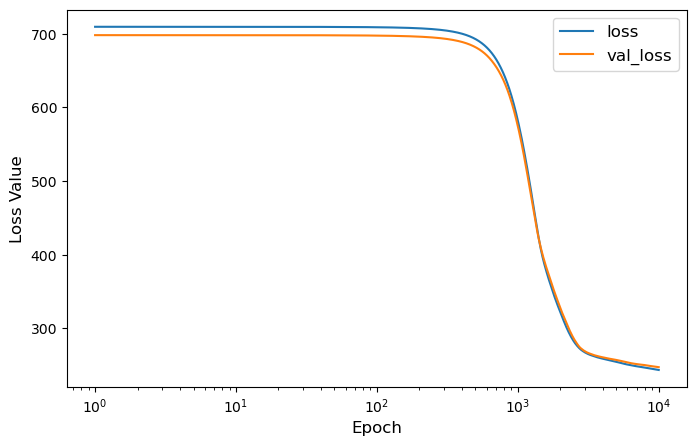

In [18]:
# plot losses against epoch number in log-scale
plt.figure(figsize=(8,5),dpi=100)
plt.semilogx(epoch, loss, linewidth=1.5, label='loss')
plt.semilogx(epoch, val_loss, linewidth=1.5, label='val_loss')
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Loss Value',fontsize=12)
plt.legend(loc=1,fontsize=12)

Learning rate is too small; further training is required

### Evaluation on Test Data

In [19]:
# predicted bike rental rate
y_pred = ann.predict(X_test)

Text(0, 0.5, 'Predicted value')

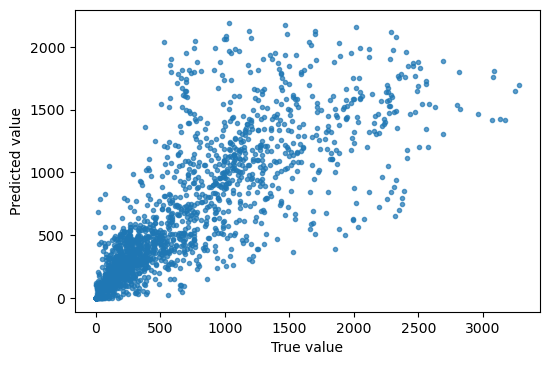

In [20]:
# plot of true rental rate against predicted value 
plt.figure(figsize=(6,4),dpi=100)
plt.plot(y_test.values,y_pred,'o',markersize=3,alpha=0.7)
plt.xlabel('True value')
plt.ylabel('Predicted value')

Text(0, 0.5, 'Probability Distribution')

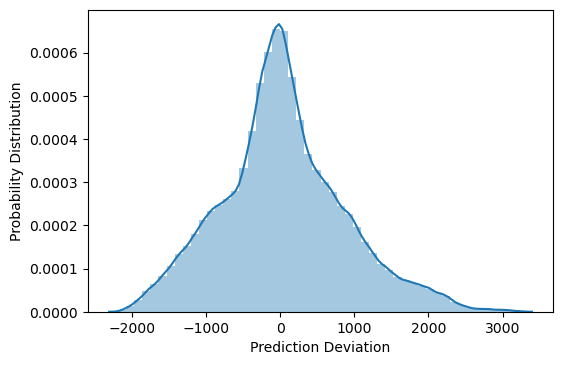

In [21]:
# distribution plot of prediction devations
plt.figure(figsize=(6,4),dpi=100)
sns.distplot(y_test.values-y_pred)
plt.xlabel('Prediction Deviation')
plt.ylabel('Probability Distribution')

Now we compute some performance metric in predicting the test values

In [22]:
from sklearn.metrics import explained_variance_score, r2_score

metric = {'value':[]}

# explained variance
exp_var = round(explained_variance_score(y_test,y_pred),3)
metric['value'].append(exp_var)

# R^2_score
r2 = round(r2_score(y_test,y_pred),3)
metric['value'].append(r2)

df_metric = pd.DataFrame(index=['explained_variance','R_squared'],
                         data=metric,
                         columns=['value'])

In [23]:
df_metric

,value
explained_variance,0.624
R_squared,0.620


Metric values are bad because of underfitting